Throughout my project, I analyzed the 2000 public companies listed in the Forbes 2000 magazine for the year 2022. The Forbes Global 2000 is an annual ranking that assesses the world's largest and most influential public companies, based on a composite score of various factors such as revenue, profits, assets, and market capitalization.
My analysis focused on the top ten companies worldwide, examining their performance in terms of profits, assets, market value, sales-to-expense ratio, profit margin, return on asset, and asset turnover. By doing so, I aimed to gain insights into which types of companies performed best across the different metrics.
The project was divided into four parts. The first part analyzed the overall performance of all companies worldwide, while the second part zoomed in on the best-performing US companies. In the third part, I delved into the performance of the top-performing Chinese companies, and in the fourth part, I compared the performance of Chinese and US companies and explored the different industries in which they operate and the products and services they offer.
By reading my report, one can gain valuable knowledge about the world's most powerful corporations, the industries they operate in, and the products and services they provide.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [668]:
df = pd.read_csv('forbes_companies_2022.csv')

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   2000 non-null   int64  
 1   global_company         2000 non-null   object 
 2   country                2000 non-null   object 
 3   sales                  2000 non-null   float64
 4   profit                 2000 non-null   float64
 5   assets                 2000 non-null   float64
 6   market_value           2000 non-null   float64
 7   expenses               2000 non-null   float64
 8   sales_to_market_Value  2000 non-null   float64
 9   profit_margin          2000 non-null   float64
 10  ROA                    2000 non-null   float64
 11  Asset_turnover         2000 non-null   float64
 12  sales_to_expenses      2000 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 203.2+ KB


In [670]:
df.isna().sum()

rank              0
global company    0
country           0
sales             0
profit            0
assets            0
market value      0
dtype: int64

In [671]:
df.duplicated().sum()

0

In [808]:
df.head()

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover,sales_to_expenses
0,1,Berkshire Hathaway,United States,276.09,89.80,958.78,741.48,186.29,0.372350,0.325256,9.37,0.287960,1.482044
1,2,ICBC,China,208.13,54.03,5518.51,214.43,154.10,0.970620,0.259597,0.98,0.037715,1.350616
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38,105.36,576.04,2292.08,295.02,0.174680,0.263150,18.29,0.695056,1.357128
3,4,JPMorgan Chase,United States,124.54,42.12,3954.69,374.45,82.42,0.332594,0.338205,1.07,0.031492,1.511041
4,5,China Construction Bank,China,202.07,46.89,4746.95,181.32,155.18,1.114439,0.232048,0.99,0.042568,1.302165



The dataset presented several issues that needed to be addressed. Specifically, the columns for rank, sales, and profit contained trailing whitespace that made it challenging to call them. To resolve this, I utilized the strip() function to remove the unwanted whitespace. Additionally, I used the replace() function to add an underscore for the columns of global company and market value.
The rows for sales, assets, market value, and profits were also problematic, making it impossible to compare the performance of companies. To tackle this, I wrote a function that leveraged the strip() and replace() functions to remove the dollar sign ($), whitespace, and commas. Furthermore, the rows had units of millions and billions, which I resolved by writing a function that identified rows in the million denomination, divided them by 1000, and converted them into billions.
For instance, if the input value was "5000m," the code would eliminate the "m" character, convert the remaining string "5000" to a float, divide the float value by 1000, and return the result as 5.0.
Finally, I used the apply function to apply the convert_to_billion function to all the columns and rows.


In [673]:
df.columns = [col.strip() if col.strip() in ['rank','sales','profit'] else  col for col in df.columns]

In [674]:
def rename_col(df,col_names):
    for col_name in col_names:
        new_col_name = col_name.replace(' ','_')
        df = df.rename(columns={col_name:new_col_name})
    return df

In [675]:
df=rename_col(df,['global company','market value'])

In [676]:
def remove_char(df,cols):
    for col in cols:
        df[col] = df[col].str.strip()
        df[col]= df[col].str.strip('$')
        df[col]=df[col].str.replace(',','')
    return df 

In [677]:
remove_char(df,['sales','profit','assets','market_value'])

,rank,global_company,country,sales,profit,assets,market_value
0,1,Berkshire Hathaway,United States,276.09 B,89.8 B,958.78 B,741.48 B
1,2,ICBC,China,208.13 B,54.03 B,5518.51 B,214.43 B
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38 B,105.36 B,576.04 B,2292.08 B
3,4,JPMorgan Chase,United States,124.54 B,42.12 B,3954.69 B,374.45 B
4,5,China Construction Bank,China,202.07 B,46.89 B,4746.95 B,181.32 B
...,...,...,...,...,...,...,...
1995,1995,"Shenzhen Feima International Supply Chain Co.,...",China,37 M,1.41 B,166 M,1.14 B
1996,1997,NMDC,India,3.52 B,1.41 B,5.71 B,6.4 B
1997,1997,Sichuan Changhong Electric,China,15.72 B,53.1 M,12.11 B,1.96 B
1998,1999,Credit Bank of Moscow,Russia,2.53 B,370.1 M,45.15 B,2.06 B


In [896]:
df.head(5)

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover,sales_to_expenses
0,1,Berkshire Hathaway,United States,276.09,89.80,958.78,741.48,186.29,0.372350,0.325256,9.37,0.287960,1.482044
1,2,ICBC,China,208.13,54.03,5518.51,214.43,154.10,0.970620,0.259597,0.98,0.037715,1.350616
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38,105.36,576.04,2292.08,295.02,0.174680,0.263150,18.29,0.695056,1.357128
3,4,JPMorgan Chase,United States,124.54,42.12,3954.69,374.45,82.42,0.332594,0.338205,1.07,0.031492,1.511041
4,5,China Construction Bank,China,202.07,46.89,4746.95,181.32,155.18,1.114439,0.232048,0.99,0.042568,1.302165


In [679]:
def convert_to_billions(value):
    if 'M' in str(value):
        value = value.replace('M','')
        return float(value[:-1]) / 1000
    else:
        value= value.replace('B','')
        return float(value)

In [680]:
df['sales'] = df['sales'].apply(convert_to_billions) 

In [681]:
df['profit'] = df['profit'].apply(convert_to_billions)

In [682]:
df['assets'] = df['assets'].apply(convert_to_billions)

In [683]:
df['market_value']= df['market_value'].apply(convert_to_billions)

In [684]:
df.head()

,rank,global_company,country,sales,profit,assets,market_value
0,1,Berkshire Hathaway,United States,276.09,89.80,958.78,741.48
1,2,ICBC,China,208.13,54.03,5518.51,214.43
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38,105.36,576.04,2292.08
3,4,JPMorgan Chase,United States,124.54,42.12,3954.69,374.45
4,5,China Construction Bank,China,202.07,46.89,4746.95,181.32


# Computation

Here are the key metrics that were created to compare the performances of the top 2000 publicly listed companies:

Profits: Measures the net income. Market value: Measures the market value of the company. The formula is the Number of Shares outstanding x the price of the share.

Assets: Assets can include physical property such as buildings, land, and equipment, as well as financial assets like cash, investments, and accounts receivable. This metric is used to assess a company's financial health and potential for growth. Assets refer to the economic resources owned by a company that can be used to generate future economic profits.

Sales: Measure the total revenue generated by the company.

Expenses: Measures the company expenses that can include costs of goods sold, operating expenses, investing expenses such as investing into property, plant and equipment, stocks and bonds from other companies, taxes, and other expenses. Formula: Sales-Profits = Expenses

Profit Margin: Measures how much profit the company generated per dollar in revenue. For example: If the profit margin is 0.6, the company made 0.6 USD profits per dollar earned in revenue, which is a strong number. The Formula is Net Income/Total Revenue.


Return on Assets: Net Income/ Total Assets or Average Assets The ROA measures how much the company earned in profit per dollar of its assets.

Asset Turnover: Revenue/Total Asset or Average Assets Measures how much the company generated in revenue per dollar of its assets.

Sales-Market-Value Ratio: Measures how much the company generated in revenue per dollar of its market capitalization.


Sales-to-Expenses: is a financial ratio that measures a company's ability to generate revenue in relation to its total expenses. It is calculated by dividing a company's total sales revenue by its total expenses. The higher the ratio, the more efficiently a company is generating revenue from its expenses.

In [685]:
df['expenses'] = df['sales']-df['profit'] 

In [686]:
df['sales_to_market_Value'] = df['sales']/df['market_value']

In [775]:
df['profit_margin']= (df['profit']/df['sales'])

In [897]:
df['ROA'] = round((df['profit']/df['assets'])*100,2)

In [689]:
df['Asset_turnover'] = df['sales']/df['assets']

In [690]:
df.tail(50)

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover
1950,1951,Steris,Ireland,4.250,0.2805,11.690,23.380,3.9695,0.181779,0.066000,2.40,0.363559
1951,1951,Yamada Denki,Japan,15.130,0.5149,11.570,2.470,14.6151,6.125506,0.034032,4.45,1.307692
1952,1953,XPO Logistics,United States,16.440,0.3400,8.710,6.400,16.1000,2.568750,0.020681,3.90,1.887486
1953,1954,Hera,Italy,12.480,0.3942,16.220,5.680,12.0858,2.197183,0.031587,2.43,0.769420
1954,1955,Hokkoku Financial Holdings,Japan,0.700,0.0535,48.350,0.677,0.6465,1.033973,0.076429,0.11,0.014478
1955,1956,Far Eastern New Century,Taiwan,8.550,0.3467,22.960,5.550,8.2033,1.540541,0.040550,1.51,0.372387
1956,1956,Intco Medical Technology,China,2.840,1.4700,3.150,3.330,1.3700,0.852853,0.517606,46.67,0.901587
1957,1958,ADNOC Drilling,United Arab Emirates,2.270,0.6039,5.100,16.180,1.6661,0.140297,0.266035,11.84,0.445098
1958,1958,Mashreq Bank,United Arab Emirates,2.540,0.2728,48.200,4.180,2.2672,0.607656,0.107402,0.57,0.052697
1959,1958,Shenzhou International Group Holdings,Hong Kong,3.700,0.5220,6.610,20.580,3.1780,0.179786,0.141081,7.90,0.559758


In [691]:
df['sales_to_expenses'] = df['sales']/df['expenses']

# Analysis

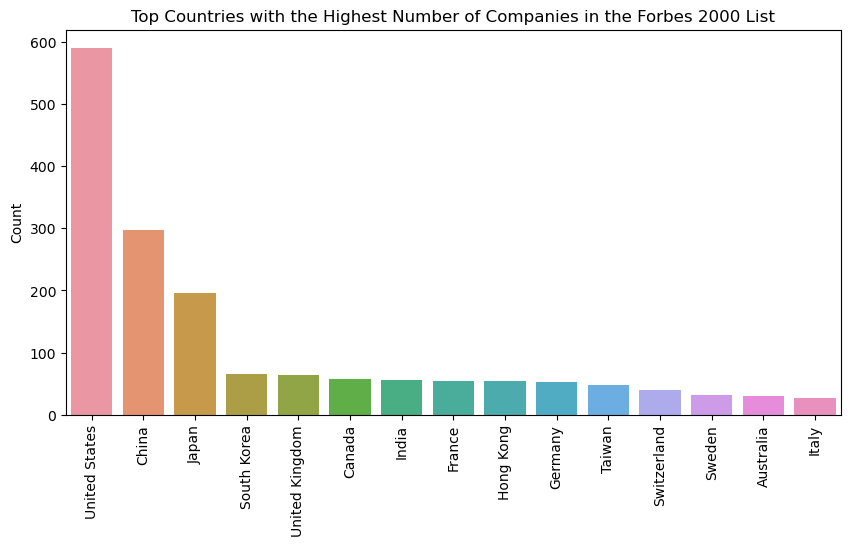

In [830]:
plt.figure(figsize=(10,5))
sns.countplot(x='country',data=df,order=top_countries.index)
plt.xticks(rotation=90)
plt.title('Top Countries with the Highest Number of Companies in the Forbes 2000 List')
plt.ylabel('Count')
plt.xlabel('')

plt.show()

The graph depicts the top 15 countries with the highest number of companies featured in Forbes 2000. Out of these countries, the US stands out with 590 public companies, followed by China with 297 public companies. Japan comes in third place, with 196 public companies listed in Forbes 2000.

In [693]:
country_counts=df['country'].value_counts()
country_counts

United States           590
China                   297
Japan                   196
South Korea              65
United Kingdom           64
Canada                   58
India                    55
France                   54
Hong Kong                54
Germany                  52
Taiwan                   48
Switzerland              40
Sweden                   32
Australia                30
Italy                    26
Netherlands              24
Russia                   24
Brazil                   23
Ireland                  21
Spain                    21
Saudi Arabia             16
Thailand                 14
Israel                   13
South Africa             13
United Arab Emirates     13
Denmark                  11
Singapore                11
Turkey                    9
Austria                   9
Finland                   9
Luxembourg                9
Mexico                    9
Poland                    8
Norway                    8
Indonesia                 7
Malaysia            

In [822]:
top_countries= country_counts[:15] 

In [820]:
top_sales=df.sort_values(by='sales',ascending=False)[['global_company','sales','country']].head(15)
top_sales

,global_company,sales,country
22,Walmart,572.75,United States
5,Amazon,469.82,United States
2,Saudi Arabian Oil Company (Saudi Aramco),400.38,Saudi Arabia
44,Sinopec,384.82,China
20,PetroChina,380.31,China
6,Apple,378.70,United States
21,UnitedHealth Group,297.55,United States
24,Volkswagen Group,295.73,Germany
41,CVS Health,291.98,United States
9,Toyota Motor,281.75,Japan


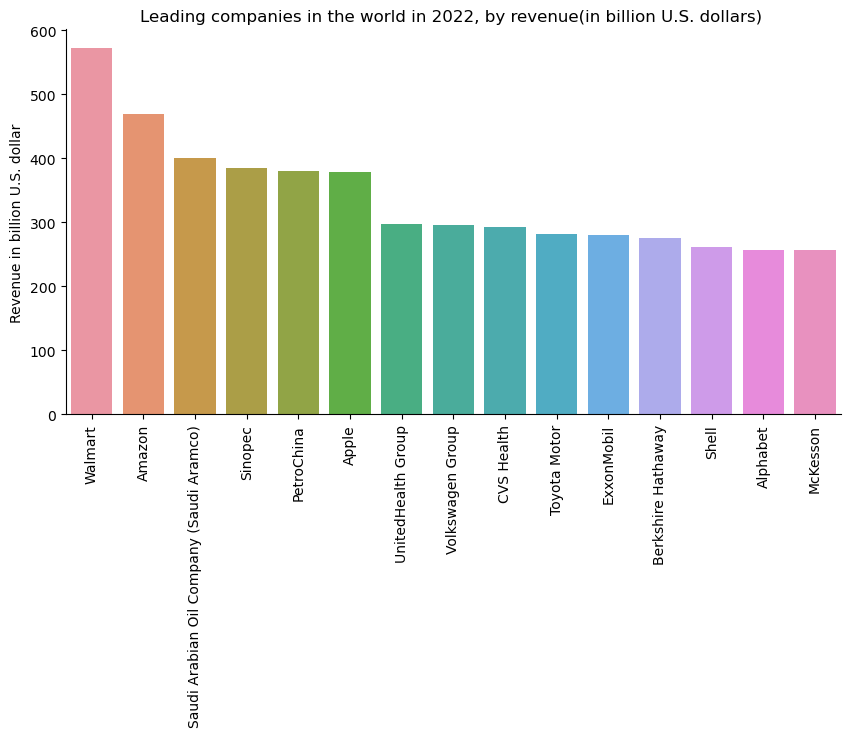

In [832]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='sales',data=top_sales)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by revenue(in billion U.S. dollars) ')
plt.ylabel('Revenue in billion U.S. dollar')
plt.xlabel('')
sns.despine()
plt.show()

The graph presents data on the 15 companies that had the highest revenue in 2022. It shows that Walmart earned the highest revenue with around 572 billion, while Amazon closely followed in second place with around 496 billion. Saudi Aramaco ranked third with a revenue of approximately 400 billion.

These top 15 companies operate in various industries including technology, healthcare, financial services, oil and gas, automobile, and retail.

In [697]:
top_profit = df.sort_values(by='profit',ascending=False)[['global_company','profit','country']].head(10)
top_profit

,global_company,profit,country
2,Saudi Arabian Oil Company (Saudi Aramco),105.36,Saudi Arabia
6,Apple,100.56,United States
0,Berkshire Hathaway,89.80,United States
10,Alphabet,76.03,United States
11,Microsoft,71.19,United States
1,ICBC,54.03,China
4,China Construction Bank,46.89,China
3,JPMorgan Chase,42.12,United States
33,Meta Platforms,39.37,United States
7,Agricultural Bank of China,37.38,China


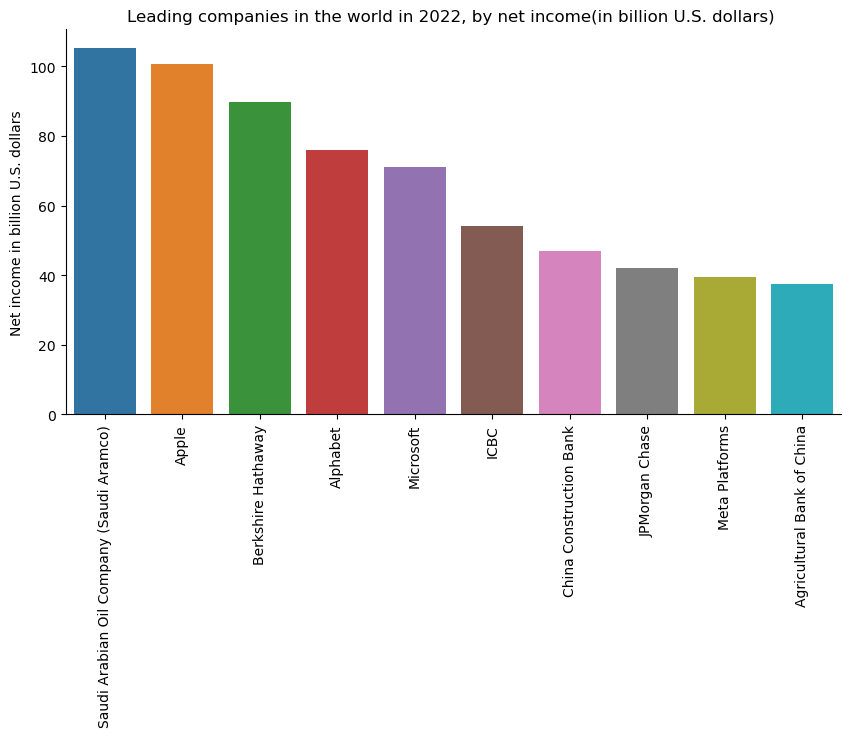

In [865]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='profit',data=top_profit)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by net income(in billion U.S. dollars) ')
plt.ylabel('Net income in billion U.S. dollars')
plt.xlabel('')
sns.despine()
plt.show()

According to the graph, the top 10 companies with the highest net income are displayed. Saudi Aramco takes first place with a net income of 105.36 billion, while Apple ranks second with a profit of around 105 billion. In third place is Berkshire Hathaway, with an estimated net income of approximately 90 billion. Alphabet and Microsoft complete the top 5. Notably, six out of the ten most profitable companies are from the US, while three are from China, and one is Saudi Aramco. The top 10 companies are dominated by US and Chinese companies, representing a diverse range of industries, including banking, oil and gas, tech, and financial services.

In [699]:
top_market_value= df.sort_values(by='market_value',ascending=False)[['global_company','market_value']].head(10)
top_market_value

,global_company,market_value
6,Apple,2640.32
2,Saudi Arabian Oil Company (Saudi Aramco),2292.08
11,Microsoft,2054.37
10,Alphabet,1581.72
5,Amazon,1468.40
149,Tesla,1038.73
0,Berkshire Hathaway,741.48
33,Meta Platforms,499.86
56,Taiwan Semiconductor,494.60
21,UnitedHealth Group,490.15


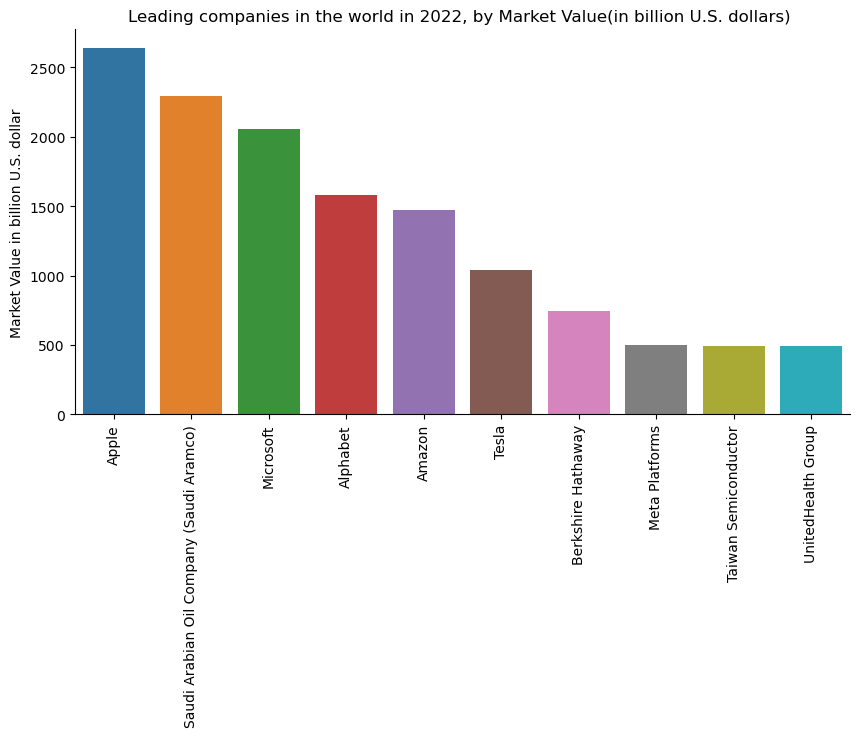

In [864]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='market_value',data=top_market_value)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Market Value(in billion U.S. dollars) ')
plt.ylabel('Market Value in billion U.S. dollar')
plt.xlabel('')
sns.despine()
plt.show()

The graph shows the top ten companies with the highest market value, with Apple leading the pack at approximately 2.64 trillion, followed by Saudi Aramco at about 2.3 trillion, and Microsoft in third place with a market value of 2.05 trillion.

Out of the top ten, six are technology companies, while Saudi Aramco is a gas and oil company from Saudi Arabia. Berkshire Hathaway is a mega-holding conglomerate that operates in various industries, such as insurance, financial services, and manufacturing. UnitedHealth Group, a US-based healthcare company that provides health insurance and healthcare services to individuals and organizations, also made the list. Additionally, Taiwan Semiconductor Manufacturing Company Limited (TSMC), a multinational semiconductor manufacturing company headquartered in Taiwan, is included in the top ten. TSMC manufactures semiconductors for customers such as Apple, NVIDIA, and AMD.

In [701]:
top_assets = df.sort_values(by='assets',ascending=False)[['global_company','assets','country']].head(10)
top_assets

,global_company,assets,country
1,ICBC,5518.51,China
4,China Construction Bank,4746.95,China
7,Agricultural Bank of China,4561.05,China
335,Fannie Mae,4229.90,United States
12,Bank of China,4192.84,China
3,JPMorgan Chase,3954.69,United States
8,Bank of America,3238.22,United States
58,Mitsubishi UFJ Financial,3176.37,Japan
360,Freddie Mac,3025.59,United States
39,BNP Paribas,2995.89,France


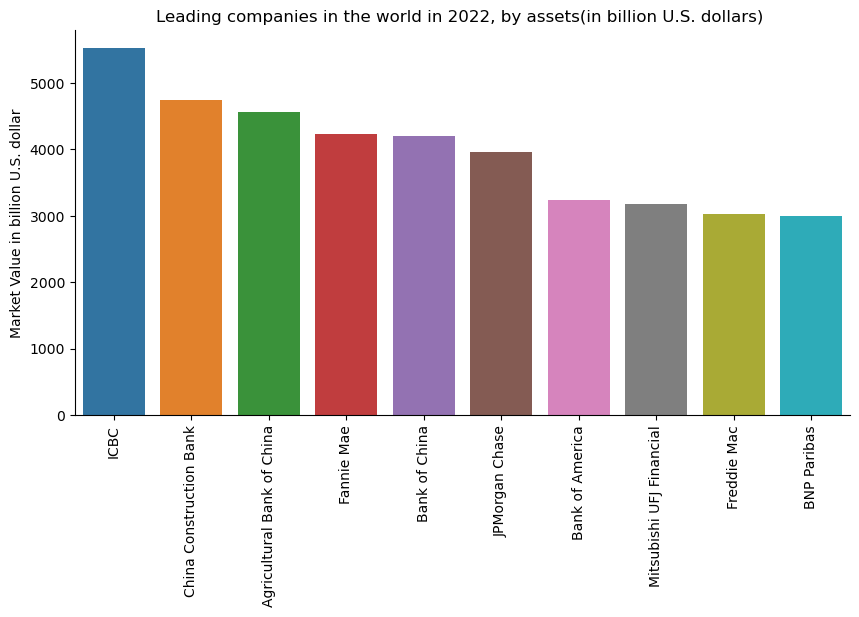

In [835]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='assets',data=top_assets)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by assets(in billion U.S. dollars) ')
plt.ylabel('Market Value in billion U.S. dollar')
plt.xlabel('')
sns.despine()
plt.show()

The graph displays the top ten companies that hold the largest amount of assets, with the Industrial and Commercial Bank of China holding assets worth over 5.5 trillion. China Construction Bank follows closely in second place with approximately 4.7 trillion in assets, and the Agricultural Bank of China secures third place with approximately 4.56 trillion in assets. Fannie Mae and the Bank of China complete the top five.
It is worth noting that the top ten list is dominated by banks and government-sponsored enterprises that hold massive amounts of assets. These assets can include physical property such as buildings, land, and equipment, as well as financial assets like cash, investments, and accounts receivable.

In [705]:
top_ROA = df.sort_values(by='ROA',ascending=False)[['global_company','ROA']].head(13)
top_ROA[2:]

,global_company,ROA
1995,"Shenzhen Feima International Supply Chain Co.,...",849.40
1942,Bradespar,110.29
586,Vivendi,76.92
1893,F&F,67.76
1107,Chesapeake Energy,57.49
1822,Info Edge India,56.19
1749,Bayan Resources,49.79
371,Moderna,49.06
1177,ZIM Integrated Shipping Services,47.15
1956,Intco Medical Technology,46.67


In [706]:
df[df['global_company']=='Shenzhen Feima International Supply Chain']

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover,sales_to_expenses


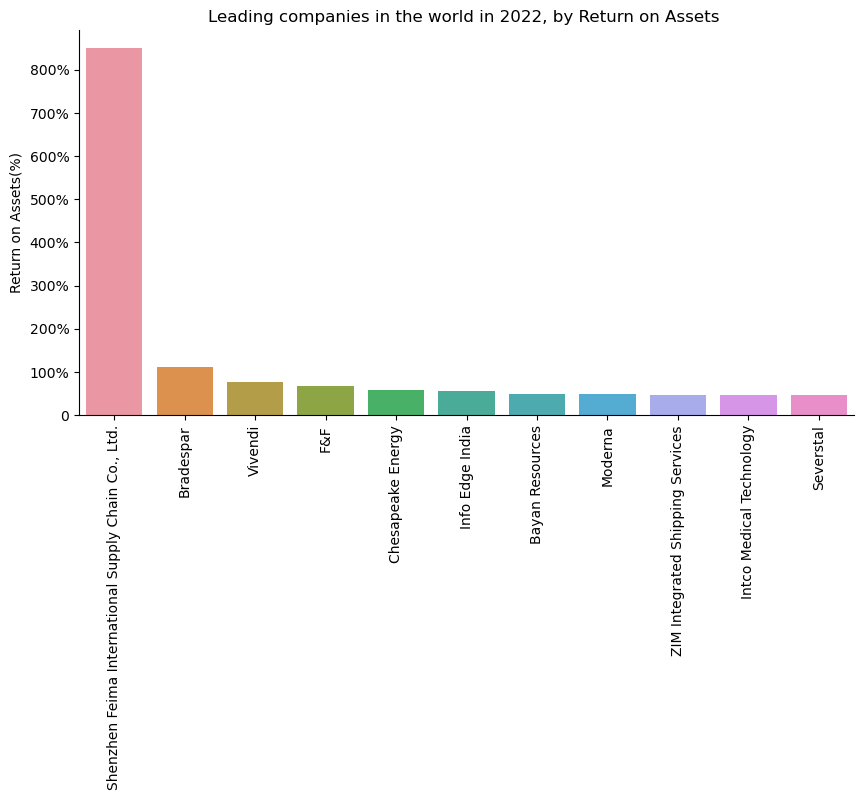

In [836]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='ROA',data=top_ROA[2:])
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Return on Assets ')
plt.ylabel('Return on Assets(%)')
plt.xlabel('')
plt.yticks([0,100,200,300,400,500,600,700,800],['0','100%','200%','300%','400%','500%','600%','700%','800%'])
sns.despine()
plt.show()


The graph depicts the top ten companies with the highest Return to Assets ratio. Shenzhen Feima International Supply Chain leads the pack, generating 8 in profits for every dollar of assets it possesses. It is worth noting that the company has a relatively high profit-to-sales ratio, and further examination of its financial statements is required to understand why its profit was 1.41 billion while revenue was only 37 million in 2022. To ensure clarity, I removed the company in the next graph.
Following Shenzhen Feima International Supply Chain, Bradespar ranks second with a return to assets ratio of $1.1 in profits for every dollar of its assets.


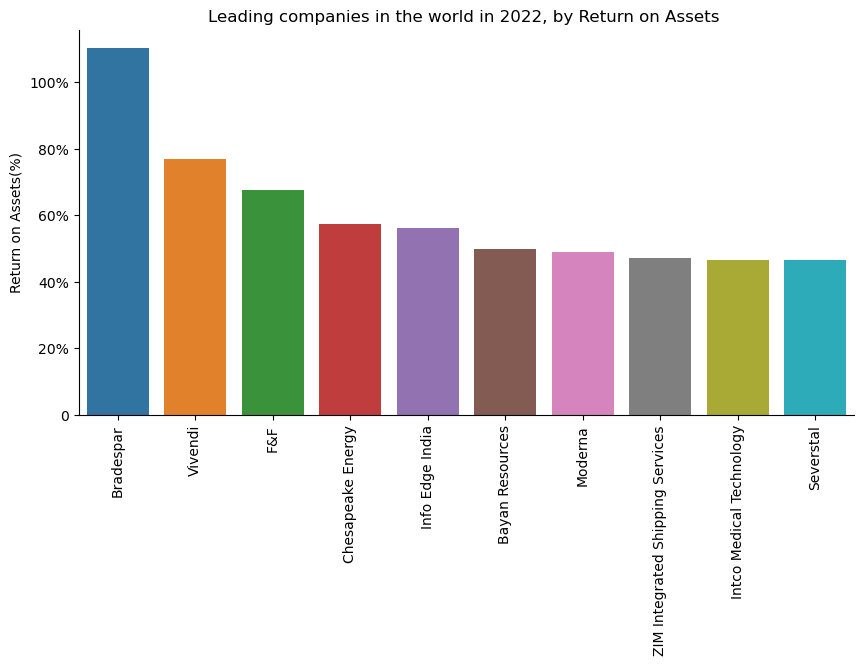

In [837]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='ROA',data=top_ROA[3:])
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Return on Assets ')
plt.ylabel('Return on Assets(%)')
plt.xlabel('')
plt.yticks([0,20,40,60,80,100],['0','20%','40%','60%','80%','100%'])
sns.despine()
plt.show()

This graph shows the top 10 companies with the highest Return on Assets ratio, excluding Shenzhen Feima International Supply Chain. These companies have Returns on Assets ranging from approximately 0.461 USD to around 1.1 USD in profits per dollar of assets.Bradespar is a Brazilian holding company that invests in companies operating in different sectors, such as mining, energy, telecommunications, and logistics. 

In [709]:
profit_margin = df.sort_values(by='profit_margin',ascending=False)[['global_company','profit_margin','country']].head(10)
profit_margin[1:]

,global_company,profit_margin,country
1995,"Shenzhen Feima International Supply Chain Co.,...",38.108108,China
672,Porsche Automobil Holding,35.761589,Germany
1328,Sofina,26.016949,Belgium
1868,PT Saratoga Investama Sedaya,14.146341,Indonesia
1056,3i Group,11.570997,United Kingdom
1822,Info Edge India,8.842105,India
1875,Kinnevik,8.686869,Sweden
827,Segro,7.430093,United Kingdom
1639,Akelius Residential Property,6.573427,Sweden


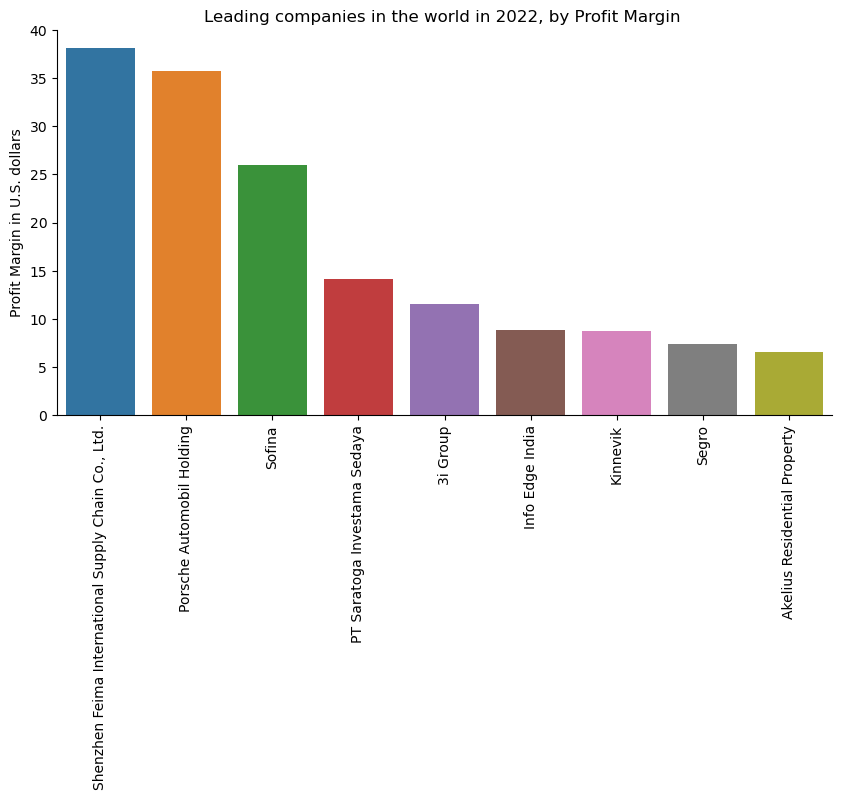

In [838]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='profit_margin',data=profit_margin[1:])
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Profit Margin ')
plt.ylabel('Profit Margin in U.S. dollars')
plt.xlabel('')

sns.despine()
plt.show() 

This graph shows the top ten companies with the highest profit margin, calculated by dividing the profit by the sales revenue. Notably, Shenzhen Feima International Supply Chain had an unusually high-profit margin of 40 USD for every dollar of revenue, which could potentially be a result of a one-time gain, accounting error, or fraudulent activity. Further investigation, beyond the available dataset, would be required to determine the cause of such a high-profit margin. Porsche Automobile Holding had the second-highest profit margin at 35 USD for every dollar of revenue.





In [711]:
sales_market = df.sort_values(by='sales_to_market_Value',ascending=False)[['global_company','sales_to_market_Value']].head(10)

In [712]:
sales_market 

,global_company,sales_to_market_Value
1116,Finatis,211.286550
1378,X5 Retail Group,207.847222
360,Freddie Mac,127.540984
335,Fannie Mae,114.011364
1734,Rite Aid,59.347826
1574,HNA Technology,34.553719
1340,StoneX Group,34.266187
1932,Xiamen Xinde,33.572854
1904,China Aviation Oil,31.387900
1679,Zheshang Development Group,28.531828


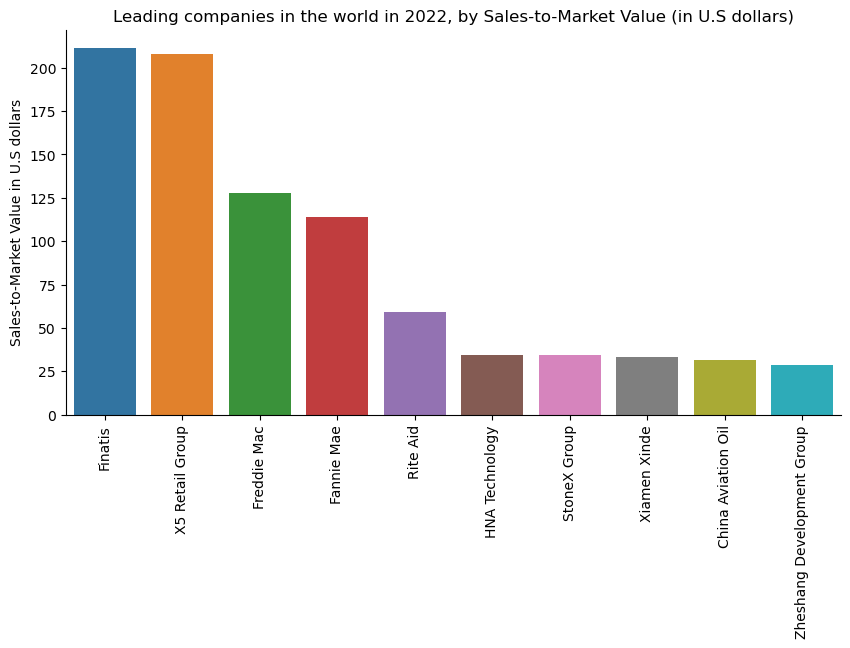

In [841]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='sales_to_market_Value',data=sales_market)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Sales-to-Market Value (in U.S dollars)')
plt.ylabel('Sales-to-Market Value in U.S dollars')
plt.xlabel('')
sns.despine()
plt.show()

This graph illustrates the top ten companies with the highest Sales-to-Market Value ratio, which measures how effectively a company is utilizing its market value to generate revenue. Finatis has the highest ratio of 200 USD in sales for every dollar of market value.


In [714]:
top_asset_turnover = df.sort_values(by='Asset_turnover',ascending=False)[['global_company','Asset_turnover']].head(10)
top_asset_turnover

,global_company,Asset_turnover
451,China State Construction Engineering,548.773333
669,PICC,457.360406
1574,HNA Technology,25.808642
1904,China Aviation Oil,11.454545
1656,Rajesh Exports,11.111111
1641,World Fuel Services,5.269360
1679,Zheshang Development Group,5.016245
1932,Xiamen Xinde,4.961652
1437,Xiamen Xiangyu,4.763963
1417,Xiamen International Trade Group,4.694915


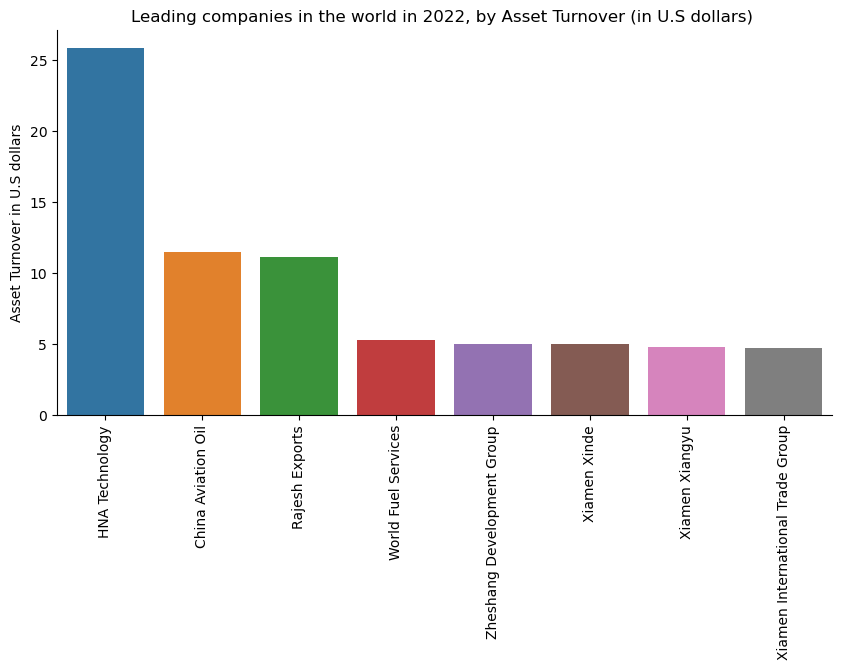

In [843]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='Asset_turnover',data=top_asset_turnover[2:])
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Asset Turnover (in U.S dollars) ')
plt.ylabel('Asset Turnover in U.S dollars')
plt.xlabel('')
sns.despine()
plt.show()

The graph displays the top ten companies ranked by their efficiency in generating sales from their assets, as measured by the Sales to Assets Ratio. HNA Technology had the highest ratio, generating approximately 25.8 dollars of sales per every dollar of asset. China Aviation Oil ranked second with a ratio of 11.41 USD of sales per dollar of asset.

In [716]:
top_sales_expenses= df.sort_values(by='sales_to_expenses',ascending=False)[['global_company','sales_to_expenses']].head(10)
top_sales_expenses

,global_company,sales_to_expenses
1624,K+S,14.074074
683,Thomson Reuters,9.921875
1464,Covivio,7.812500
1107,Chesapeake Energy,7.393939
1821,Crescent Point Energy,6.108108
1091,Unicaja Banco,4.567568
1987,Whitecap Resources,4.550000
1287,Frontier Communications Parent,4.420690
523,Prologis,4.351351
1458,Duke Realty,4.294004


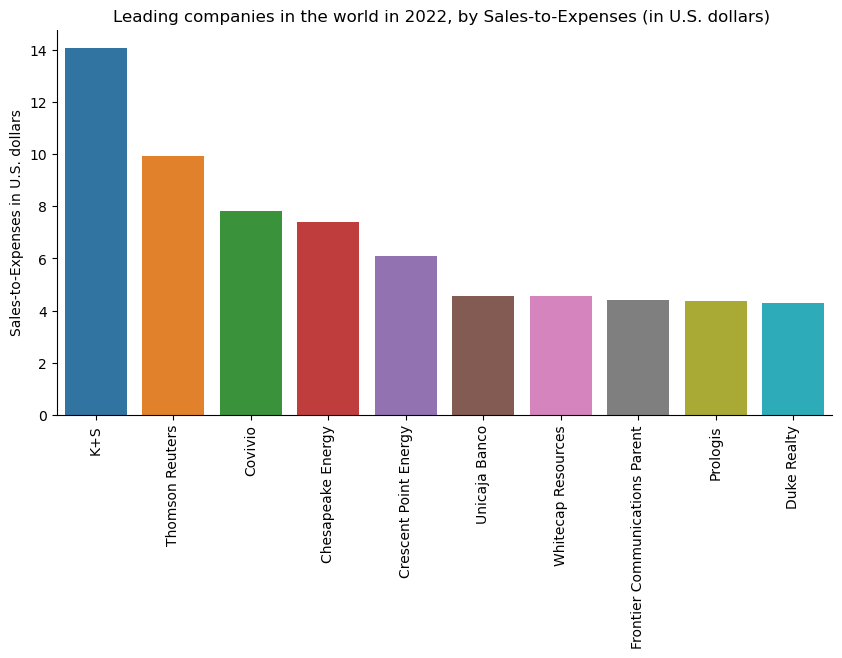

In [863]:
plt.figure(figsize=(10,5))
sns.barplot(x='global_company',y='sales_to_expenses',data=top_sales_expenses)
plt.xticks(rotation=90)
plt.title('Leading companies in the world in 2022, by Sales-to-Expenses (in U.S. dollars) ')
plt.ylabel('Sales-to-Expenses in U.S. dollars')
plt.xlabel('')
sns.despine()
plt.show()

The graph illustrates the companies with the highest Sales-to-Expense Ratio. K+S had a ratio of 14, meaning its sales were 14 times higher than its expenses. Thomson Reuters had a ratio of nearly 10, indicating that its sales were almost 10 times higher than its expenses.

In [718]:
highest_expenses = df.sort_values(by='expenses',ascending=False)[['global_company','expenses','sales']].head(10)
highest_expenses

,global_company,expenses,sales
22,Walmart,559.08,572.75
5,Amazon,436.46,469.82
44,Sinopec,373.78,384.82
20,PetroChina,366.02,380.31
2,Saudi Arabian Oil Company (Saudi Aramco),295.02,400.38
41,CVS Health,284.07,291.98
21,UnitedHealth Group,280.10,297.55
24,Volkswagen Group,278.19,295.73
6,Apple,278.14,378.70
14,ExxonMobil,257.47,280.51


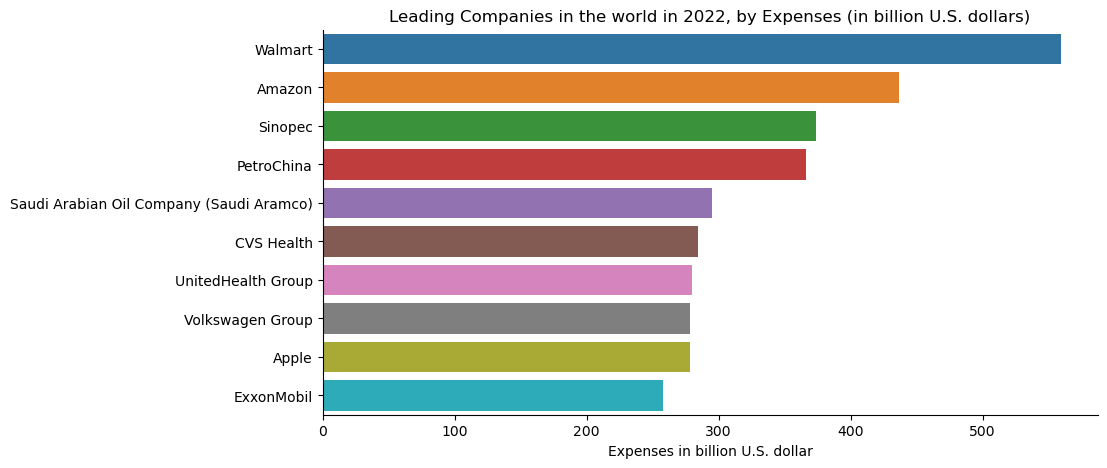

In [862]:
plt.figure(figsize=(10,5))

sns.barplot(x='expenses',y='global_company',data=highest_expenses)
plt.title('Leading Companies in the world in 2022, by Expenses (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Expenses in billion U.S. dollar')
sns.despine()
plt.show()

This graph illustrates the top ten companies with the highest expenses in 2022. It's not surprising since all of these companies generate a massive amount of revenue as well.

In [720]:
lowest_profit=df.sort_values(by='profit',ascending=True)[['global_company','profit','country']].head(10)
lowest_profit

,global_company,profit,country
1192,Kuaishou Technology,-12.05,China
1093,Telecom Italia,-10.19,Italy
1218,Carnival Corporation,-9.42,United States
1943,Hainan Airlines Holding,-7.96,China
1321,DiDi Global,-7.64,China
1375,Royal Caribbean Group,-5.26,United States
1438,Rivian,-4.69,United States
718,Korea Electric Power,-4.64,South Korea
428,Boeing,-4.20,United States
1302,Air France-KLM,-3.89,France


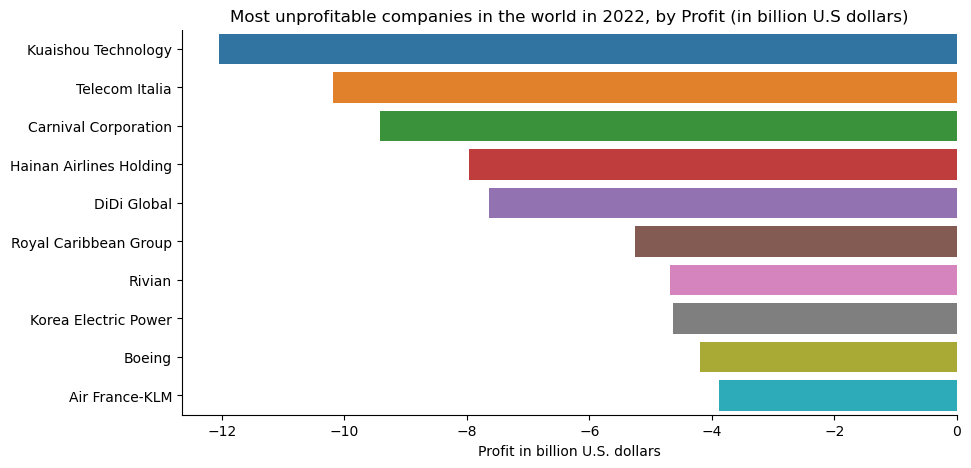

In [898]:
plt.figure(figsize=(10,5))

sns.barplot(x='profit',y='global_company',data=lowest_profit)
plt.title('Most unprofitable companies in the world in 2022, by Profit (in billion U.S dollars)')
plt.ylabel('')
plt.xlabel('Profit in billion U.S. dollars')
sns.despine()
plt.show()

The graph depicts the ten publicly traded companies with the largest losses in 2022. Kuaishou Technology, a Chinese company, reported a net loss of 12.05 billion, while Telecom Italia had a loss of 10.19 billion.

In [776]:
lowest_profit_margin = df.sort_values(by='profit_margin')[['global_company','profit_margin']].head(10)
lowest_profit_margin

,global_company,profit_margin
1783,Lucid Motors,-112.222222
1438,Rivian,-85.272727
1722,Alpha Bank,-8.643216
1375,Royal Caribbean Group,-3.437908
1218,Carnival Corporation,-2.683761
1855,Airports of Thailand,-2.370354
1943,Hainan Airlines Holding,-1.413854
1740,BeiGene,-1.194915
1696,Piraeus Financial Holdings,-1.069069
1192,Kuaishou Technology,-0.957870


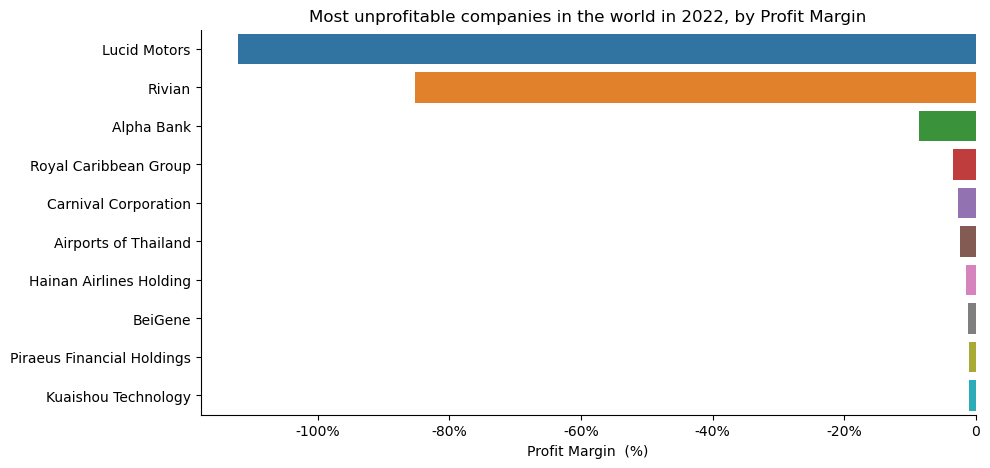

In [860]:
plt.figure(figsize=(10,5))

sns.barplot(x='profit_margin',y='global_company',data=lowest_profit_margin)
plt.title('Most unprofitable companies in the world in 2022, by Profit Margin')
plt.ylabel('')
plt.xlabel('Profit Margin  (%)')
sns.despine()
plt.xticks([-100,-80,-60,-40,-20,0],['-100%','-80%','-60%','-40%','-20%','0'])
plt.show()

The graph displays the top ten companies with the lowest profit margins in 2022. Lucid Motors had a negative profit margin of 112%, indicating that the company incurred a loss of 1.12 USD for every dollar of revenue generated. Similarly, Rivian had a negative profit margin of 85%, implying a loss of 0.85 USD for every dollar of revenue. All companies in the top ten incurred losses as their expenses exceeded their revenues.

# USA

In [725]:
usa=df[df['country']=='United States']
usa

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover,sales_to_expenses
0,1,Berkshire Hathaway,United States,276.09,89.8000,958.78,741.48,186.2900,0.372350,0.325256,9.37,0.287960,1.482044
3,4,JPMorgan Chase,United States,124.54,42.1200,3954.69,374.45,82.4200,0.332594,0.338205,1.07,0.031492,1.511041
5,6,Amazon,United States,469.82,33.3600,420.55,1468.40,436.4600,0.319954,0.071006,7.93,1.117156,1.076433
6,7,Apple,United States,378.70,100.5600,381.19,2640.32,278.1400,0.143430,0.265540,26.38,0.993468,1.361545
8,9,Bank of America,United States,96.83,31.0000,3238.22,303.10,65.8300,0.319466,0.320149,0.96,0.029902,1.470910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1977,Tapestry,United States,6.51,0.8363,7.93,8.70,5.6737,0.748276,0.128464,10.55,0.820933,1.147399
1981,1982,Group 1 Automotive,United States,13.71,0.5336,5.75,2.86,13.1764,4.793706,0.038920,9.28,2.384348,1.040497
1983,1984,Unity Software,United States,1.11,-0.5326,4.84,22.41,1.6426,0.049531,-0.479820,-11.00,0.229339,0.675758
1986,1986,Twilio,United States,2.84,-0.9499,13.00,22.29,3.7899,0.127411,-0.334472,-7.31,0.218462,0.749360


In [726]:
usa_top_sales= usa.sort_values(by='sales',ascending=False)[['global_company','sales']].head(10)
usa_top_sales

,global_company,sales
22,Walmart,572.75
5,Amazon,469.82
6,Apple,378.70
21,UnitedHealth Group,297.55
41,CVS Health,291.98
14,ExxonMobil,280.51
0,Berkshire Hathaway,276.09
10,Alphabet,257.49
276,McKesson,257.01
297,AmerisourceBergen,221.10


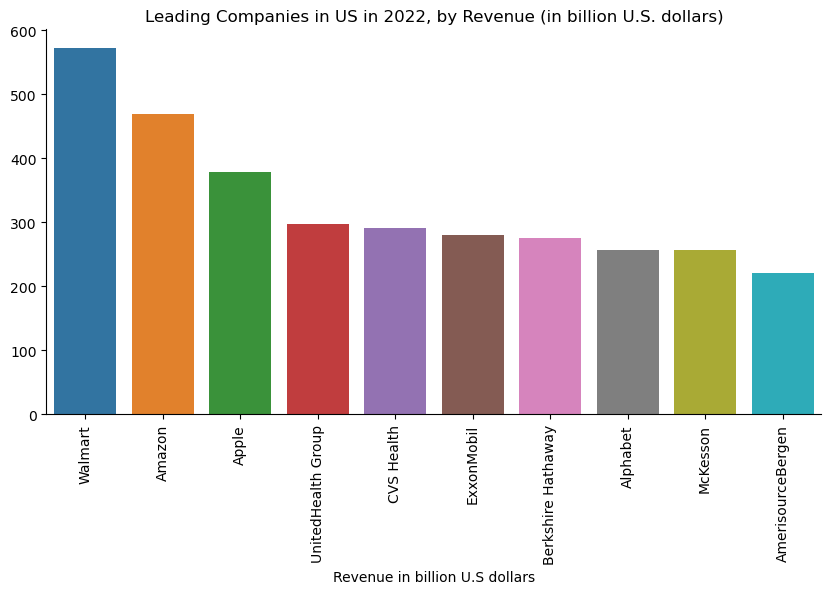

In [859]:
plt.figure(figsize=(10,5))

sns.barplot(y='sales',x='global_company',data=usa_top_sales)
plt.title('Leading Companies in US in 2022, by Revenue (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Revenue in billion U.S dollars')
sns.despine()
plt.xticks(rotation=90)
plt.show()

The graph represents the top ten companies in the United States with the highest sales in 2022. Walmart tops the list with sales of approximately 572 billion USD, followed by Amazon in second place with close to 470 billion USD, and Apple in third place with sales of 389 billion USD

Out of the ten companies in this list 3 operate in the technology industry, one operates in retail, four operate in the healthcare industry, one operatess in the oil and gas industry and we have one mega conglomerate holding company that operates in insurance,financial services and other industries.

In [728]:
top_profit_usa= usa.sort_values(by='profit',ascending=False)[['global_company','profit']].head(10)
top_profit_usa

,global_company,profit
6,Apple,100.56
0,Berkshire Hathaway,89.80
10,Alphabet,76.03
11,Microsoft,71.19
3,JPMorgan Chase,42.12
33,Meta Platforms,39.37
5,Amazon,33.36
8,Bank of America,31.00
14,ExxonMobil,23.04
335,Fannie Mae,22.18


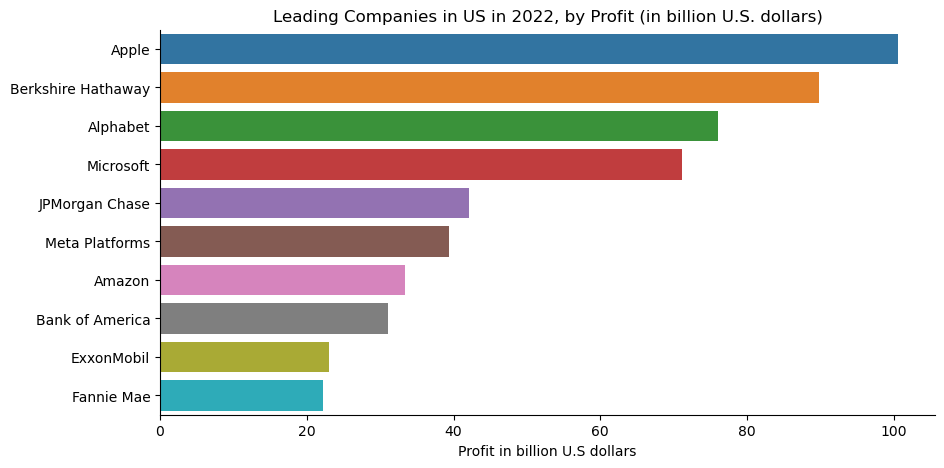

In [854]:
plt.figure(figsize=(10,5))

sns.barplot(x='profit',y='global_company',data=top_profit_usa)
plt.title('Leading Companies in US in 2022, by Profit (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Profit in billion U.S dollars')
sns.despine()
plt.show()

The graph presents the top ten companies with the highest profits in 2022, with Apple leading the list by generating close to 100 billion in profits. Following Apple is Berkshire Hathaway, which made approximately 90 billion in profits, and Alphabet, which made 76.03 billion in profits. Out of the ten companies, five are technology companies that have influenced the lives of over a billion people. The list also includes two banks and a conglomerate holding company that has companies in insurance, transportation, manufacturing, finance, and other industries. Additionally, Fannie Mae, a government-sponsored enterprise that focuses on providing liquidity to the housing market, is included in the list. Lastly, ExxonMobil, which is one of the largest publicly traded multinational oil and gas companies in the world, is also among the top ten companies.

In [730]:
top_market_usa= usa.sort_values(by='market_value',ascending=False)[['global_company','market_value']].head(10)
top_market_usa 

,global_company,market_value
6,Apple,2640.32
11,Microsoft,2054.37
10,Alphabet,1581.72
5,Amazon,1468.40
149,Tesla,1038.73
0,Berkshire Hathaway,741.48
33,Meta Platforms,499.86
21,UnitedHealth Group,490.15
207,NVIDIA,489.83
38,Johnson & Johnson,477.38


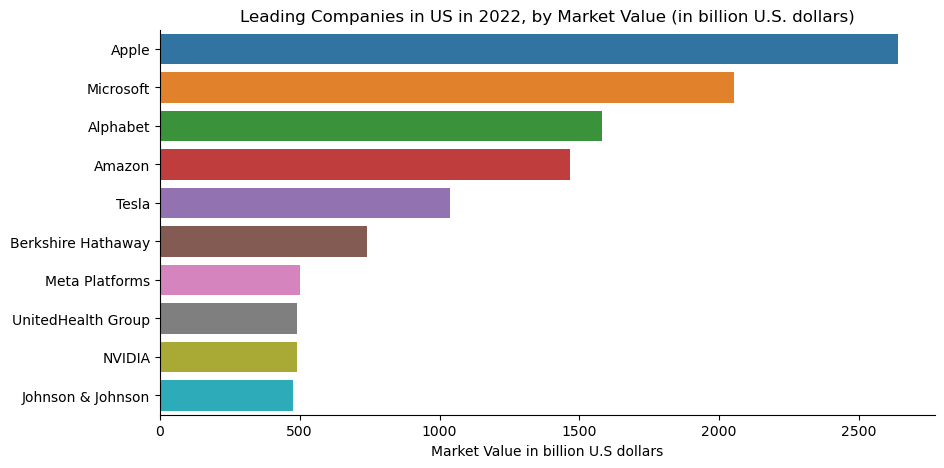

In [856]:
plt.figure(figsize=(10,5))

sns.barplot(x='market_value',y='global_company',data=top_market_usa)
plt.title('Leading Companies in US in 2022, by Market Value (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Market Value in billion U.S dollars')
sns.despine()
plt.show() 

The graph illustrates the top ten US companies with the highest market value in 2022, where Apple holds the top spot at around 2.64 trillion followed by Microsoft at approximately 2.05 trillion, and Alphabet at around 1.5 trillion. While most of the companies in the list are from the technology industry, Johnson & Johnson and UnitedHealth Group operate in different segments of the healthcare industry. UnitedHealth is focused on health insurance and healthcare services while Johnson & Johnson is a multinational company that operates in the pharmaceutical, medical devices, and consumer health products sectors. Lastly, Berkshire Hathaway is a large conglomerate holding that spans across multiple industries in the US.

In [732]:
top_asset_usa= usa.sort_values(by='assets',ascending=False)[['global_company','assets']].head(10)
top_asset_usa

,global_company,assets
335,Fannie Mae,4229.90
3,JPMorgan Chase,3954.69
8,Bank of America,3238.22
360,Freddie Mac,3025.59
26,Citigroup,2394.11
17,Wells Fargo,1939.71
36,Goldman Sachs Group,1589.00
35,Morgan Stanley,1222.23
0,Berkshire Hathaway,958.78
84,Prudential Financial,937.58


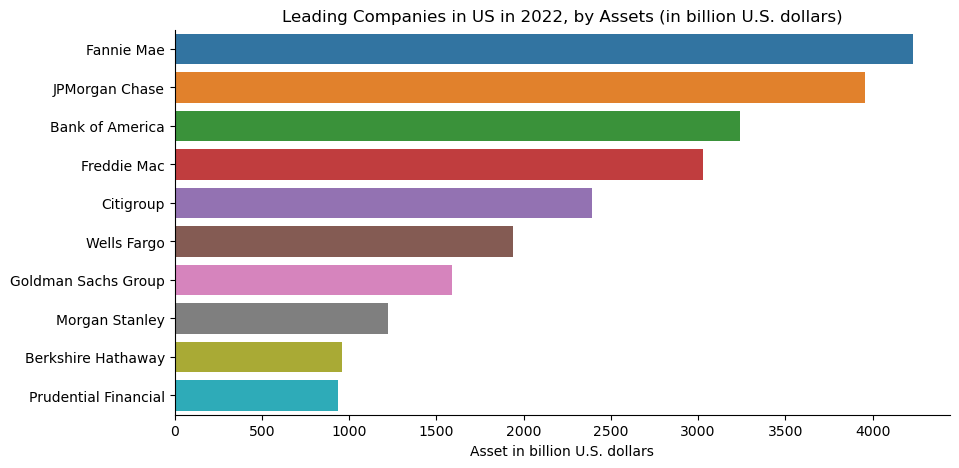

In [858]:
plt.figure(figsize=(10,5))

sns.barplot(x='assets',y='global_company',data=top_asset_usa)
plt.title('Leading Companies in US in 2022, by Assets (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Asset in billion U.S. dollars')
sns.despine()
plt.show()

According to the graph, the top ten US companies with the highest assets in 2022 are presented. Fannie Mae leads the list with around 4.2 trillion, followed by JP Morgan at close to 4 trillion, and Bank of America at approximately 3.2 trillion. Among the top ten, six are banks, two are government-sponsored enterprises that offer liquidity in the housing market, one is a conglomerate operating in the financial sector, and one is Prudential Financial, a multinational financial services company providing various insurance, investment, and retirement services to individuals, businesses, and institutional clients. All of the top ten companies are primarily engaged in providing financial services to a wide range of clients.

In [778]:
sales_market_usa= usa.sort_values(by='sales_to_market_Value',ascending=False)[['global_company','sales_to_market_Value']].head(10)
sales_market_usa

,global_company,sales_to_market_Value
360,Freddie Mac,127.540984
335,Fannie Mae,114.011364
1734,Rite Aid,59.347826
1340,StoneX Group,34.266187
1641,World Fuel Services,18.197674
1882,Tenneco,12.272109
1681,United Natural Foods,10.599237
679,Cardinal Health,10.040445
1571,Rocket Companies,9.523810
1860,Qurate Retail Group,8.886076


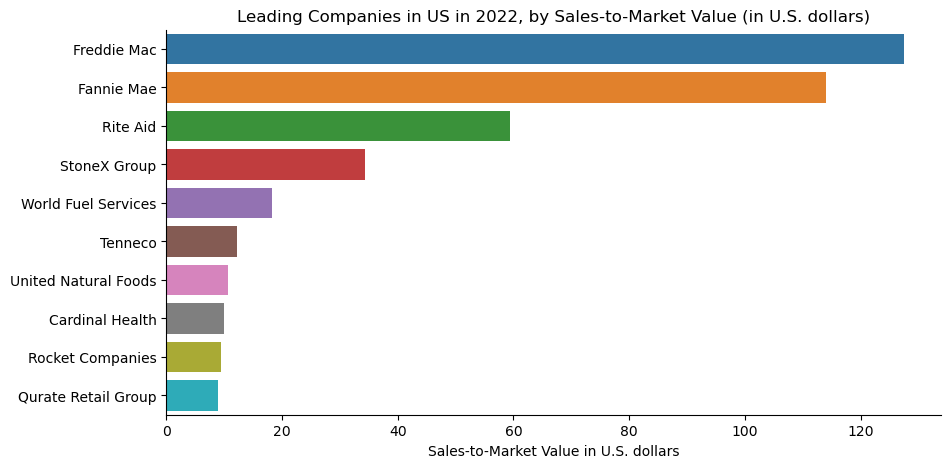

In [873]:
plt.figure(figsize=(10,5))

sns.barplot(x='sales_to_market_Value',y='global_company',data=sales_market_usa)
plt.title('Leading Companies in US in 2022, by Sales-to-Market Value (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Sales-to-Market Value in U.S. dollars')
sns.despine()
plt.show()

The graph illustrates the top ten companies in the US in 2022 with the highest Sales-to-Market Value Ratio, which indicates the efficiency of a company in generating revenue based on its market value. Freddie Mac and Fannie Mae topped the list with the highest Sales-to-Market Value ratio, generating around 114 to 127 dollars of revenue per dollar of market value.

In [738]:
profit_margin_usa= usa.sort_values(by='profit_margin',ascending=False)[['global_company','profit_margin']].head(10)
profit_margin_usa 

,global_company,profit_margin
899,Annaly Capital Management,3.269494
1036,Bio-Rad Laboratories,1.455479
1107,Chesapeake Energy,0.864754
1287,Frontier Communications Parent,0.773791
523,Prologis,0.770186
1458,Duke Realty,0.767117
1416,Liberty Broadband,0.740891
1220,VICI Properties,0.668874
371,Moderna,0.663043
1442,Kimco Realty,0.616250


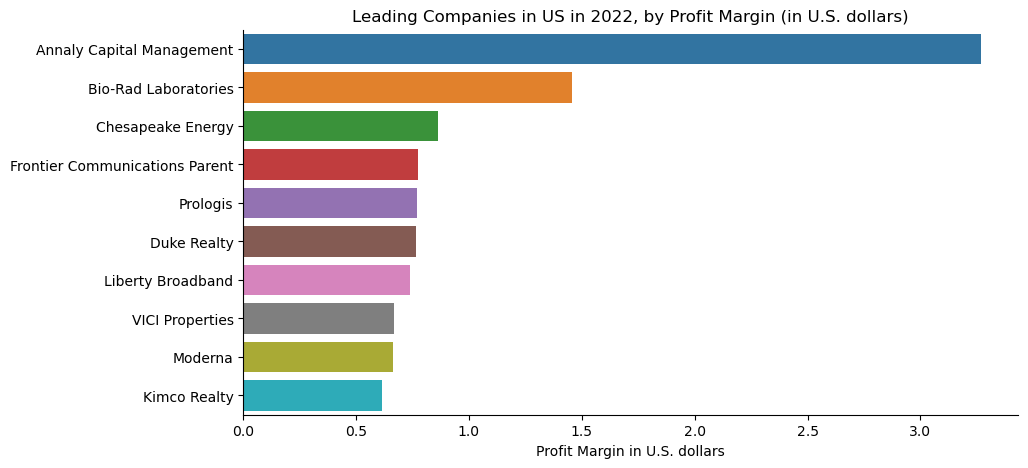

In [870]:
plt.figure(figsize=(10,5))

sns.barplot(x='profit_margin',y='global_company',data=profit_margin_usa)
plt.title('Leading Companies in US in 2022, by Profit Margin (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Profit Margin in U.S. dollars')
sns.despine()
plt.show()

The graph illustrates the top ten US companies in 2022 with the highest profit margins, with Annaly Capital Management leading the pack by generating 3.2 in profit per dollar of revenue. Bio-Rad Laboratories follows closely behind with over 1.4 in profit per dollar of revenue. The remaining companies on the list generate between 0.6 to 0.86 in profits per dollar earned in revenue. Interestingly, 60% of the companies in the list operate in the real estate industry.

In [740]:
Roa_usa= usa.sort_values(by='ROA',ascending=False)[['global_company','ROA']].head(10)
Roa_usa 

,global_company,ROA
1107,Chesapeake Energy,57.49
371,Moderna,49.06
1505,VeriSign,39.64
381,Regeneron Pharmaceuticals,31.77
347,Texas Instruments,31.36
1349,IDEXX Laboratories,30.52
721,Steel Dynamics,29.79
1287,Frontier Communications Parent,28.94
301,Nucor,27.77
504,Lam Research,27.37


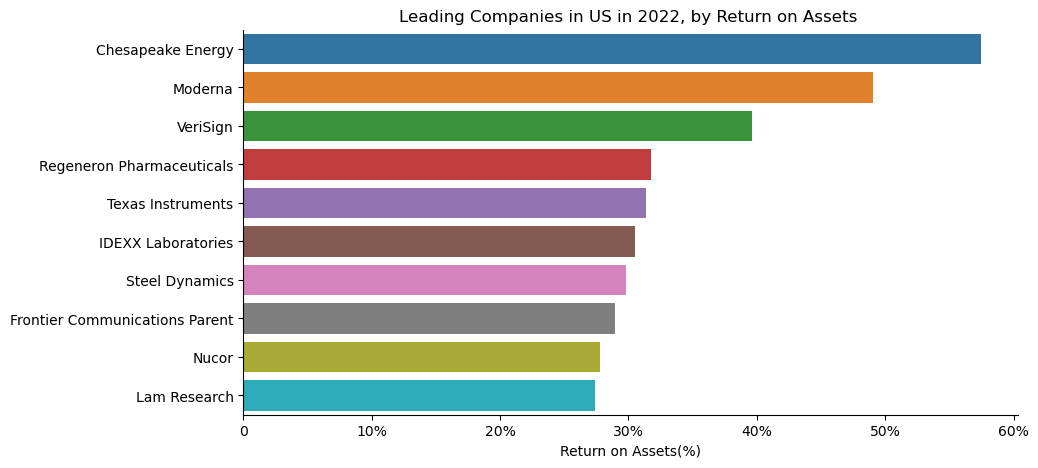

In [902]:
plt.figure(figsize=(10,5))

sns.barplot(x='ROA',y='global_company',data=Roa_usa)
plt.title('Leading Companies in US in 2022, by Return on Assets ')
plt.ylabel('')
plt.xlabel('Return on Assets(%)')
plt.xticks([0,10,20,30,40,50,60],['0','10%','20%','30%','40%','50%','60%'])
sns.despine()
plt.show() 

The graph presents the top ten US companies in 2022 with the highest Return on Assets (ROA). Chesapeake Energy emerged as the most efficient US company in generating profits with a ROA of approximately 57%. This indicates that the company earned 0.57 usd in net income for every 1 of assets it owned. Moderna, on the other hand, achieved a ROA of about 49%, which means it earned 0.49 usd in profits for every one of its assets.

In [742]:
asset_turnover_usa= usa.sort_values(by='Asset_turnover',ascending=False)[['global_company','Asset_turnover']].head(10)
asset_turnover_usa

,global_company,Asset_turnover
1641,World Fuel Services,5.269360
1914,Murphy USA,4.163070
276,McKesson,4.034061
1756,Chewy,3.951111
679,Cardinal Health,3.921474
297,AmerisourceBergen,3.839875
1681,United Natural Foods,3.560256
121,Costco Wholesale,3.332594
1053,C.H. Robinson,3.285917
1512,Performance Food Group,3.251227


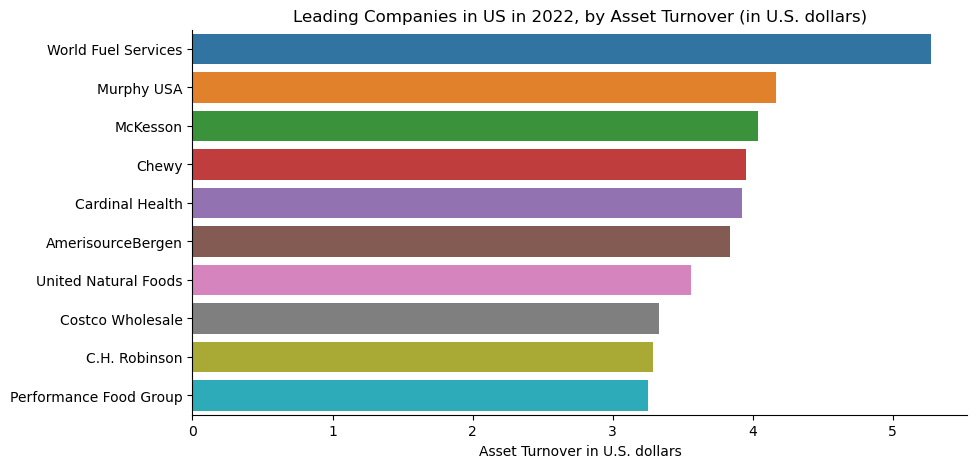

In [874]:
plt.figure(figsize=(10,5))

sns.barplot(x='Asset_turnover',y='global_company',data=asset_turnover_usa)
plt.title('Leading Companies in US in 2022, by Asset Turnover (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Asset Turnover in U.S. dollars')
sns.despine()
plt.show()

The graph displays the top ten companies in the US in 2022 with the highest Asset turnover, meaning they generate the most revenue per dollar of assets. World Fuel Services leads the list with 5.3 USD in revenue per dollar of assets, followed by Murphy USA with 4.4 USD. Among the top ten, four companies operate in the food industry, three in healthcare, and two in logistics. The remaining company is a multinational corporation with diverse business operations. These findings suggest that companies in the food, healthcare, and logistics industries tend to use their assets efficiently to generate revenue.

In [744]:
sales_expenses_usa= usa.sort_values(by='sales_to_expenses',ascending=False)[['global_company','sales_to_expenses']].head(10)
sales_expenses_usa

,global_company,sales_to_expenses
1107,Chesapeake Energy,7.393939
1287,Frontier Communications Parent,4.420690
523,Prologis,4.351351
1458,Duke Realty,4.294004
1416,Liberty Broadband,3.859375
1220,VICI Properties,3.020000
371,Moderna,2.967742
1442,Kimco Realty,2.605863
1505,VeriSign,2.439472
485,CME Group,2.265700


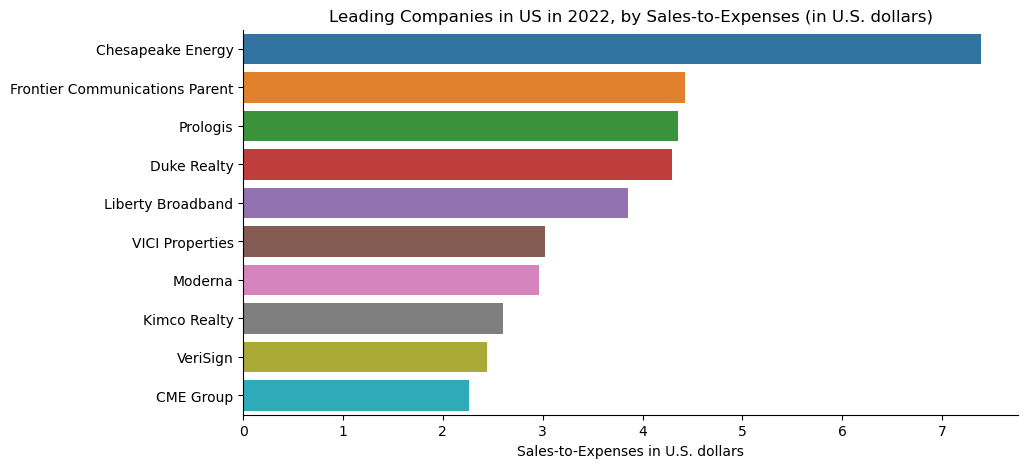

In [875]:
plt.figure(figsize=(10,5))

sns.barplot(x='sales_to_expenses',y='global_company',data=sales_expenses_usa)
plt.title('Leading Companies in US in 2022, by Sales-to-Expenses (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Sales-to-Expenses in U.S. dollars')
sns.despine()
plt.show()

In this graph, we are looking at the top ten companies in the US in 2022 that have the highest Sales to Expense ratio. Chesapeake Energy makes over 7 times its expenses in revenue, while Frontier Communications Parent makes over 4 times its expenses.
Four out of the ten companies operating in the real estate industry. The CME Group offers futures and options contracts for a wide range of asset classes. Liberty Broadband is a holding company that primarily invests in cable and broadband companies. Frontier Communications Parent is a telecommunications company that provides internet, voice, and video services to residential and business customers in various parts of the United States.
All the companies in the top ten have high up-front costs to set up everything, but once they are set up, they can sell their products and services to as many customers as possible without incurring additional costs. Chesapeake Energy primarily focuses on the exploration, development, and production of oil, natural gas, and natural gas liquids in the US.
All companies work in sectors that are crucial for everyday use. Everyone in society needs a place to live, and internet access and some need cable TV. We also need access to medical services, and we need the energy to get to work and heat our homes. All the companies offer essential services that require high up-front costs, but once the infrastructure is set up, variable costs are nearly zero.

Voice and video services refer to communication services that allow users to make phone calls and video calls to others over the internet. These services are often provided by telecommunications companies and allow users to make calls to other users who are also connected to the internet. 

# China

In [746]:
china = df[df['country']=='China']
china

,rank,global_company,country,sales,profit,assets,market_value,expenses,sales_to_market_Value,profit_margin,ROA,Asset_turnover,sales_to_expenses
1,2,ICBC,China,208.130,54.0300,5518.510,214.43,154.1000,0.970620,0.259597,0.98,0.037715,1.350616
4,5,China Construction Bank,China,202.070,46.8900,4746.950,181.32,155.1800,1.114439,0.232048,0.99,0.042568,1.302165
7,8,Agricultural Bank of China,China,181.420,37.3800,4561.050,133.38,144.0400,1.360174,0.206041,0.82,0.039776,1.259511
12,13,Bank of China,China,152.430,33.5700,4192.840,117.83,118.8600,1.293643,0.220232,0.80,0.036355,1.282433
16,17,Ping An Insurance Group,China,181.370,15.7400,1587.110,121.69,165.6300,1.490426,0.086784,0.99,0.114277,1.095031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1989,Grandjoy Holdings Group,China,6.360,0.0167,33.380,2.72,6.3433,2.338235,0.002626,0.05,0.190533,1.002633
1993,1993,Wingtech Technology,China,7.930,0.3377,11.090,12.46,7.5923,0.636437,0.042585,3.05,0.715059,1.044479
1995,1995,"Shenzhen Feima International Supply Chain Co.,...",China,0.037,1.4100,0.166,1.14,-1.3730,0.032456,38.108108,849.40,0.222892,-0.026948
1997,1997,Sichuan Changhong Electric,China,15.720,0.0531,12.110,1.96,15.6669,8.020408,0.003378,0.44,1.298101,1.003389


In [747]:
sales_china = china.sort_values(by='sales',ascending=False)[['global_company','sales']].head(10)
sales_china

,global_company,sales
44,Sinopec,384.82
20,PetroChina,380.31
1,ICBC,208.13
451,China State Construction Engineering,205.79
4,China Construction Bank,202.07
7,Agricultural Bank of China,181.42
16,Ping An Insurance Group,181.37
255,China Railway Group,166.46
370,China Railway Construction,157.66
12,Bank of China,152.43


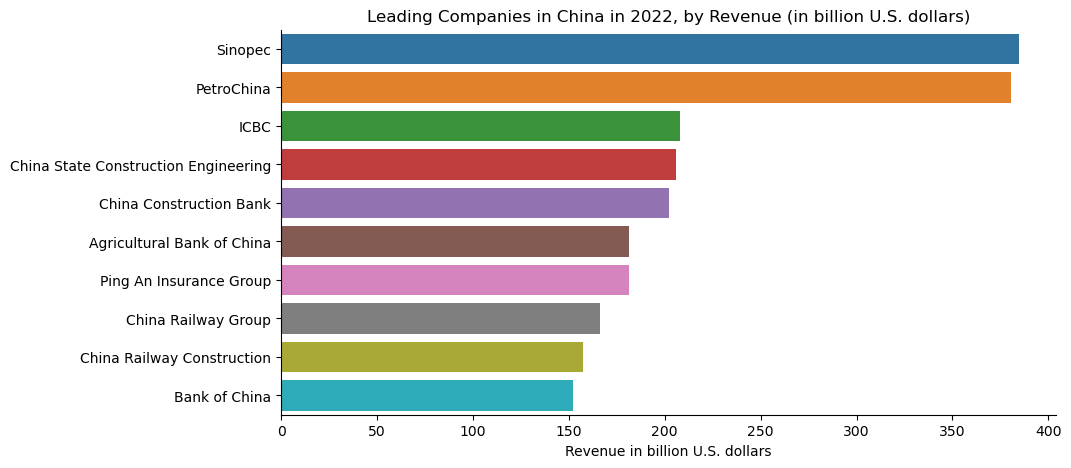

In [885]:
plt.figure(figsize=(10,5))

sns.barplot(x='sales',y='global_company',data=sales_china)
plt.title('Leading Companies in China in 2022, by Revenue (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Revenue in billion U.S. dollars')
sns.despine()
plt.show()

Leading Companies by Revenue 

The top ten US companies with the highest sales in 2022 is comprised of 3 corporation that operate in the technology company(Apple,Amazon,Alphabet),four operate in the healtcare industry(UnitedHealth group,CVS Health,McKesson,AmerisourceBergen), one operates in the oil and gas industry(ExxonMobil) and mega conglomerate holding company that operates in manufacturing,insurance,finacial services and other industries(Berkshire Hathaway).

The top ten Chinese companies with the highest sales in 2022 is comprised of 4 chinese banks(ICBC,China Construction Bank,Agricultural Bank of China,Bank of China), two corporation that operate in the oil and gas company(Sinopec,PetroChina), an insurance holding conglomerate(Ping An Insurance Group) and 3 corporation that operate in construction business(China State Construction Engineering,China Railway Group,China Railway Construction)


Both countries have at least one corporation that operates in the oil and gas industry and that operate in the insurance industry. 

China has no technology companies in the list and no corporations in that operate in healtcare industry. 

The US has no banks in the list and no construction companies. 

China is big on construction and banks, while the US makes a lot of money in tech and health care. 


According to the graph, the top ten companies in China in 2022 with the highest sales were dominated by Chinese banks, construction companies, and oil and gas companies. Sinopec, a Chinese oil and gas company, topped the list with a revenue of 384 billion, followed closely by PetroChina. The Industrial and Commercial Bank of China, the world's largest bank by total assets and market capitalization, ranked third with 208 billion in revenue. China State Construction Engineering, one of the largest construction companies in the world, generated over 205 billion in revenue. The list also included three other Chinese banks, two companies in the gas and oil business, and an insurance holding conglomerate, Ping An Insurance Group. Overall, Chinese banks, construction companies, and oil and gas companies dominated the list of top-performing companies in China in 2022.

In [749]:
profit_china = china.sort_values(by='profit',ascending=False)[['global_company','profit']].head(10)
profit_china

,global_company,profit
1,ICBC,54.03
4,China Construction Bank,46.89
7,Agricultural Bank of China,37.38
27,Tencent Holdings,34.94
12,Bank of China,33.57
23,China Merchants Bank,18.58
16,Ping An Insurance Group,15.74
20,PetroChina,14.29
242,Cosco Shipping,13.85
61,Bank of Communications,12.98


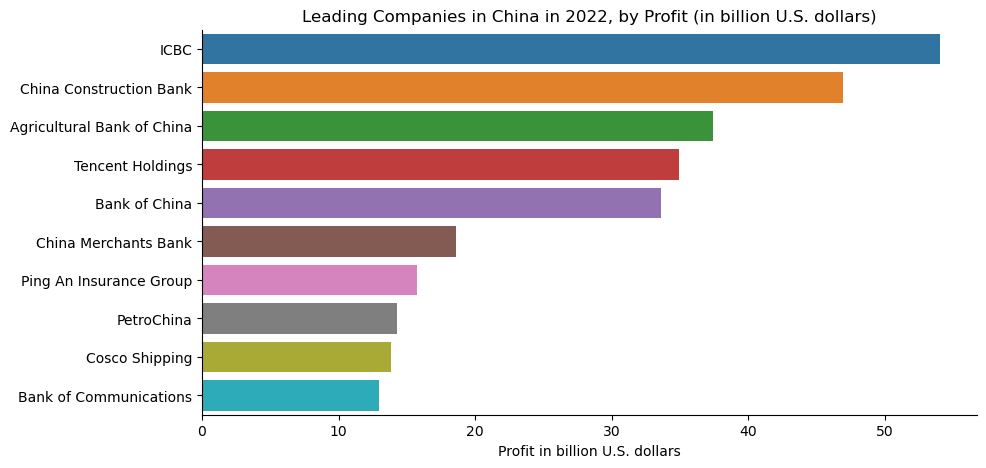

In [880]:
plt.figure(figsize=(10,5))

sns.barplot(x='profit',y='global_company',data=profit_china)
plt.title('Leading Companies in China in 2022, by Profit (in billion U.S. dollars)')
plt.ylabel('')
plt.xlabel('Profit in billion U.S. dollars')
sns.despine()
plt.show()

In 2022, the Industrial and Commercial Bank of China was the most profitable among all Chinese companies, earning a profit of $54 billion.

Out of the top ten most profitable Chinese companies in 2022, six were banks, one was a large Chinese holding conglomerate specializing in insurance and banking, one was a petroleum company, one was a massive technology conglomerate holding company, and one was a shipping and logistics company.

Tencent Holdings, a Chinese multinational conglomerate holding company, is among the largest technology and gaming firms in the world and is considered one of the "Big Five" technology companies in China. The company reported a profit of $34.94 billion in 2022.

In [751]:
market_china = china.sort_values(by='market_value',ascending=False)[['global_company','market_value']].head(10)
market_china

,global_company,market_value
27,Tencent Holdings,414.28
290,Kweichow Moutai,343.32
32,Alibaba Group,237.78
1,ICBC,214.43
4,China Construction Bank,181.32
23,China Merchants Bank,167.32
295,Contemporary Amperex Technology,148.42
20,PetroChina,142.30
7,Agricultural Bank of China,133.38
29,Postal Savings Bank Of China (PSBC),125.53


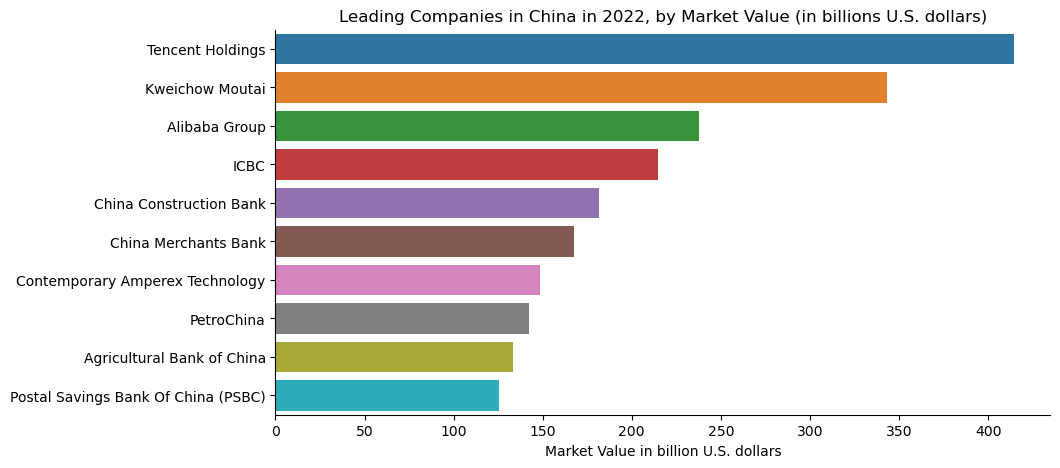

In [881]:
plt.figure(figsize=(10,5))

sns.barplot(x='market_value',y='global_company',data=market_china)
plt.title('Leading Companies in China in 2022, by Market Value (in billions U.S. dollars)')
plt.ylabel('')
plt.xlabel('Market Value in billion U.S. dollars')
sns.despine()
plt.show()

Leading Companies by Market Value in 2022

China most valuable company in terms of market capitalization is a holding company that operates in the tech industry. 
China has 5 banks on the list, one oil and gas company, one beverage company,one manufacturer of lithium-ion batteries and one multinational technology conglomerate. 


The US's most valuable company in terms of market cap is the technology company Apple at 2.66 trillion. 
The US has 7 tech companies on his list, two companies that operate in the health care industry and holding conglomerate. 


Overall the Us has more tech companies on his list and CHina has more banks on his list. 

Both have holding conglomerate. The US has no company on its list that manufactures lithium-ion batteries and one that manufactures a special type of beverage. 

China on the other hand has no companies in its healthcare industry. 

The provided chart depicts the top ten Chinese companies in 2022 based on their market capitalization. Tencent Holdings, a tech holding company, took the lead with a market cap of 414 billion dollars, followed by Kweichow Moutai with a market cap of 343 billion dollars. Kweichow Moutai is a famous Chinese liquor producer, specifically the maker of Moutai liquor, a type of baijiu. Alibaba Group, another tech company, secured the third spot with a market cap of 237 billion dollars. The list includes five Chinese banks and one petroleum company, along with Contemporary Amperex Technology in the seventh position, with a market cap of 148 billion dollars. Contemporary Amperex Technology is a Chinese manufacturer of lithium-ion batteries used in electric vehicles and energy storage systems.

In [753]:
assets_china = china.sort_values(by='assets',ascending=False)[['global_company','assets']].head(10)
assets_china

,global_company,assets
1,ICBC,5518.51
4,China Construction Bank,4746.95
7,Agricultural Bank of China,4561.05
12,Bank of China,4192.84
29,Postal Savings Bank Of China (PSBC),1975.08
61,Bank of Communications,1830.40
16,Ping An Insurance Group,1587.11
23,China Merchants Bank,1451.20
54,Industrial Bank,1350.32
147,China Citic Bank,1261.96


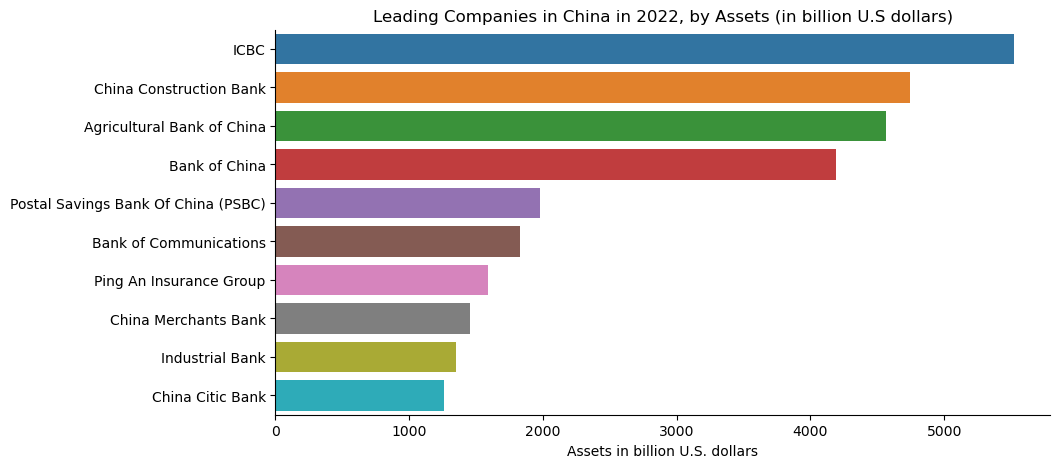

In [882]:
plt.figure(figsize=(10,5))

sns.barplot(x='assets',y='global_company',data=assets_china)
plt.title('Leading Companies in China in 2022, by Assets (in billion U.S dollars)')
plt.ylabel('')
plt.xlabel('Assets in billion U.S. dollars')
sns.despine()
plt.show()

Leading Companiesby Assets in 2022

China has 9 banks on his list and one holding insurace company. 

The US has 6 banks, two government-sponsored enterprise that provide liquidity for its housing market. One hodling congloremrate that operates in the financial services sector and one multinatiopnal financial services company.

All 20 companies operate in the Financil Sector and manange assets worht trillion of dollars.

The graph depicts the top ten Chinese companies in 2022 ranked by their total assets. The Industrial and Commercial Bank of China holds the top position with assets worth over 5.5 trillion dollars, followed by China Construction Bank with assets of around 4.74 trillion dollars. The majority of the companies on the list are banks, with one massive Chinese holding company whose subsidiaries mainly deal with insurance, banking, and financial services.

In [757]:
sales_market_china = china.sort_values(by='sales_to_market_Value',ascending=False)[['global_company','sales_to_market_Value']].head(10)
sales_market_china

,global_company,sales_to_market_Value
1574,HNA Technology,34.553719
1932,Xiamen Xinde,33.572854
1679,Zheshang Development Group,28.531828
1417,Xiamen International Trade Group,28.354331
689,Legend Holding,27.035587
462,China Evergrande Group,25.323741
1437,Xiamen Xiangyu,24.453925
1105,China Aoyuan Group,24.349776
1967,Zall Smart Commerce Group,23.223496
1255,Wuchan Zhongda Group,22.154822


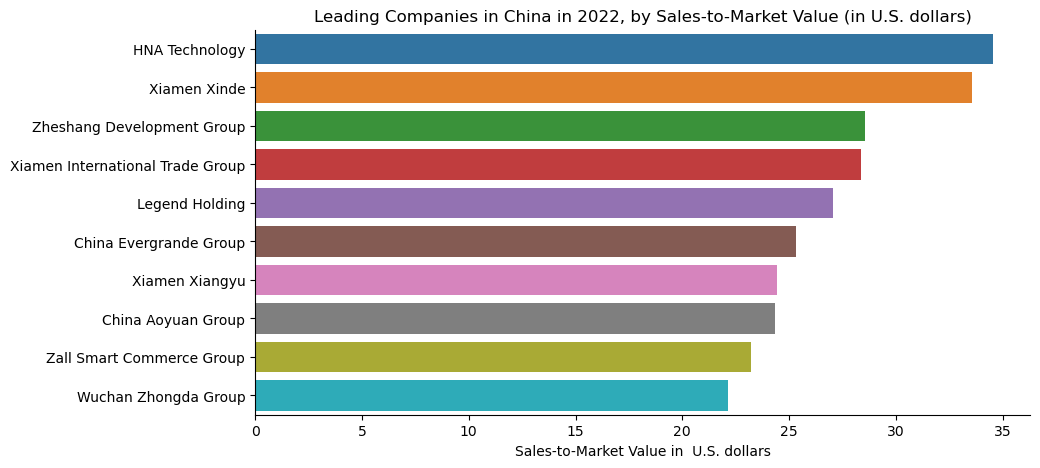

In [883]:
plt.figure(figsize=(10,5))

sns.barplot(x='sales_to_market_Value',y='global_company',data=sales_market_china)
plt.title('Leading Companies in China in 2022, by Sales-to-Market Value (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Sales-to-Market Value in  U.S. dollars')
sns.despine()
plt.show()

The graph shows the top ten Chinese companies in 2022 with the highest Sales-to-Market value ratio. HNA Technology Investments Holdings Limited had a ratio of 34 USD per dollar of market capitalization, while Xiamen Xinde Co., Ltd. had a ratio of 33 USD per dollar of market capitalization. HNA Technology is a Chinese technology conglomerate with diverse operations in industries such as information technology, e-commerce, financial technology, and aviation, among others. Xiamen Xinde, on the other hand, operates in the electronic information industry, specifically in optoelectronics and telecommunications network businesses.

In [759]:
profit_margin_china = china.sort_values(by='profit_margin',ascending=False)[['global_company','profit_margin']].head(10)
profit_margin_china

,global_company,profit_margin
1995,"Shenzhen Feima International Supply Chain Co.,...",38.108108
834,East Money Information,0.624413
290,Kweichow Moutai,0.556849
1353,Xinjiang Daqo New Energy,0.548507
1956,Intco Medical Technology,0.517606
424,China Yangtze Power,0.478873
1652,Ganfeng Lithium,0.474737
916,China International Capital,0.448753
862,Shanghai International Port,0.440154
1966,Weihai City Commercial Bank,0.425362


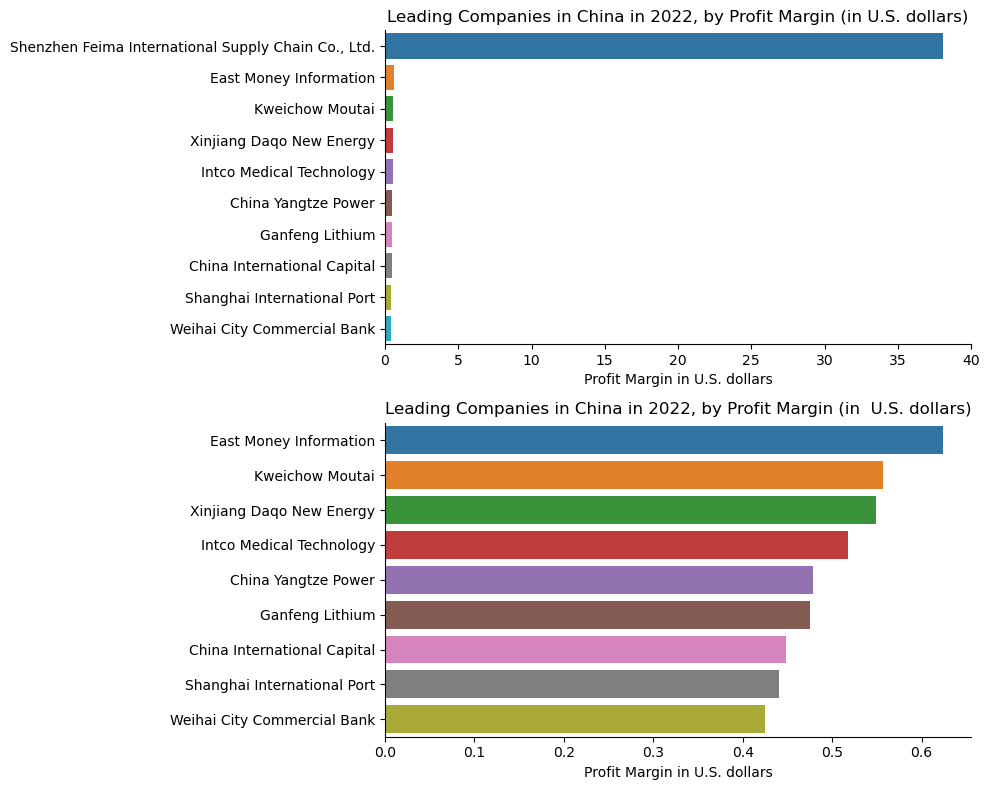

In [888]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(x='profit_margin',y='global_company',data=profit_margin_china)
plt.title('Leading Companies in China in 2022, by Profit Margin (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Profit Margin in U.S. dollars')



plt.subplot(2,1,2)
sns.barplot(x='profit_margin',y='global_company',data=profit_margin_china[1:])
plt.title('Leading Companies in China in 2022, by Profit Margin (in  U.S. dollars)')
plt.ylabel('')
plt.xlabel('Profit Margin in U.S. dollars')


plt.tight_layout()
sns.despine()
plt.show()

The two graphs display the top Chinese companies in 2022 based on their profit margin. One company, Shenzhen Feima International Supply Chain Co, stands out as generating $38 in profit for every dollar in revenue. As this is an outlier, a second graph was created with this company removed, and the remaining companies had profit margins ranging from 0.42 to 0.62 for every dollar in revenue.

In [761]:
roa_china = china.sort_values(by='ROA',ascending=False)[['global_company','ROA']].head(10)
roa_china

,global_company,ROA
669,PICC,1685.28
451,China State Construction Engineering,1565.33
1995,"Shenzhen Feima International Supply Chain Co.,...",849.40
1956,Intco Medical Technology,46.67
1180,Chongqing Zhifei Biological Products,33.55
1353,Xinjiang Daqo New Energy,32.45
1757,Shandong Hualu-Hengsheng Chemical,24.89
1713,Focus Media Information Technology,23.04
1789,Smoore International Holdings,22.82
1082,Shenzhen Mindray Bio-Medical Electronics,21.69


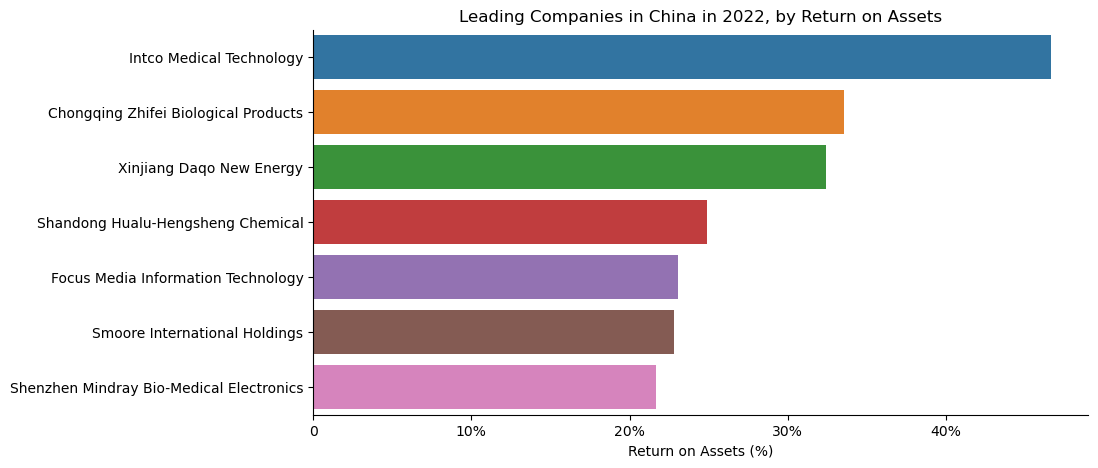

In [901]:
plt.figure(figsize=(10,5))

sns.barplot(x='ROA',y='global_company',data=roa_china[3:])
plt.title('Leading Companies in China in 2022, by Return on Assets')
plt.ylabel('')
plt.xlabel('Return on Assets (%)')
plt.xticks([0,10,20,30,40],['0','10%','20%','30%','40%'])
sns.despine()
plt.show() 

The graph shows the leading Chinese companies in 2022 with the highest Return on Assets (ROA). Intco Medical Technology tops the list with a profit of 0.4 USD for every dollar of its assets. The Company Chongqing Zhifei Biological Products	had the second highest return of assets at 33.55%, which means the company earned around 0.34 USD in net income for every of assets it owned. 

In [763]:
asset_turnover_china= china.sort_values(by='Asset_turnover',ascending=False)[['global_company','Asset_turnover']].head(10)
asset_turnover_china

,global_company,Asset_turnover
451,China State Construction Engineering,548.773333
669,PICC,457.360406
1574,HNA Technology,25.808642
1679,Zheshang Development Group,5.016245
1932,Xiamen Xinde,4.961652
1437,Xiamen Xiangyu,4.763963
1417,Xiamen International Trade Group,4.694915
1255,Wuchan Zhongda Group,4.283121
1826,Yunnan Copper Co. Ltd.,3.197068
1851,Digital China Group,3.098039


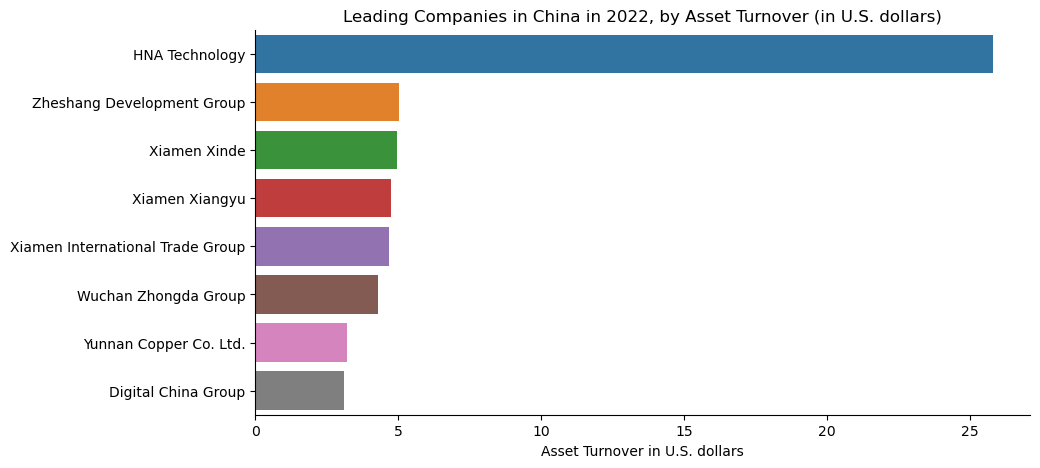

In [891]:
plt.figure(figsize=(10,5))

sns.barplot(x='Asset_turnover',y='global_company',data=asset_turnover_china[2:])
plt.title('Leading Companies in China in 2022, by Asset Turnover (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Asset Turnover in U.S. dollars')
sns.despine()
plt.show()

The graph displays the leading Chinese companies in 2022 based on their Assets turnover. HNA Technology stands out as the most efficient company, generating over 25 USD for every dollar of its assets. The rest of the companies on the list range from 3 USD to 25.8 USD of revenue per dollar of assets.

In [765]:
sales_expenses_china= china.sort_values(by='sales_to_expenses',ascending=False)[['global_company','sales_to_expenses']].head(10)
sales_expenses_china

,global_company,sales_to_expenses
834,East Money Information,2.662500
290,Kweichow Moutai,2.256569
1353,Xinjiang Daqo New Energy,2.214876
1956,Intco Medical Technology,2.072993
424,China Yangtze Power,1.918919
1652,Ganfeng Lithium,1.903808
916,China International Capital,1.814070
862,Shanghai International Port,1.786207
1966,Weihai City Commercial Bank,1.740227
1132,Luzhou Lao Jiao,1.707602


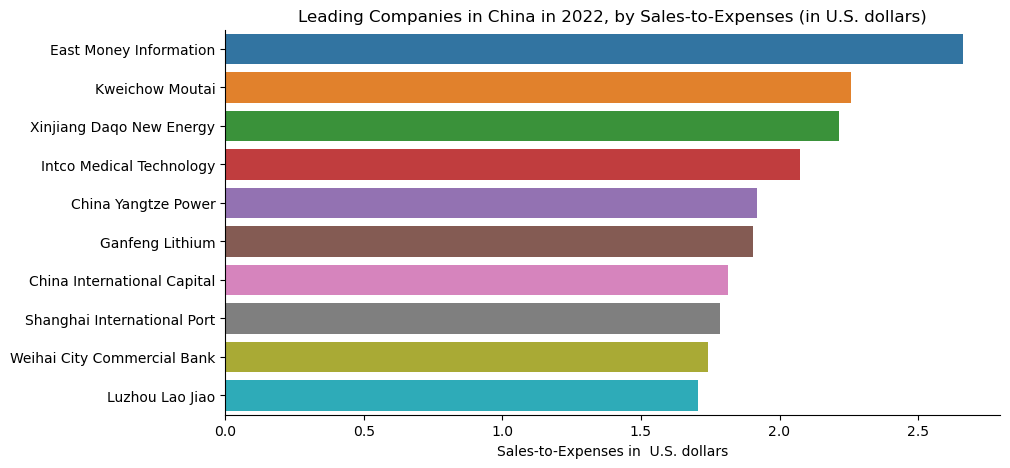

In [893]:
plt.figure(figsize=(10,5))

sns.barplot(x='sales_to_expenses',y='global_company',data=sales_expenses_china)
plt.title('Leading Companies in China in 2022, by Sales-to-Expenses (in U.S. dollars)')
plt.ylabel('')
plt.xlabel('Sales-to-Expenses in  U.S. dollars')
sns.despine()
plt.show()

The graph shows the top ten Chinese companies in 2022 with the highest Sales-to-Expense ratio. East Money Information had a ratio of 2.6, meaning that its revenue was 2.6 times higher than its expenses. The other companies on the list had ratios ranging from 1.7 to 2.6, indicating that they were able to generate significantly more revenue than they spent on expenses.

# China vs USA

Leading companies by Revenue in 2022



In 2022, China's top ten most profitable companies mainly consisted of six banks, a mega holding company operating in the insurance industry, a corporation in the gas and oil industry, a mega holding company in the tech industry, and a logistics company. On the other hand, the US's top ten most profitable companies were mostly composed of five tech companies, a conglomerate holding company in the insurance industry, a corporation in the gas and oil industry, and two banks, along with a government-sponsored enterprise that provides liquidity for the housing market.
It can be noted that China has a higher representation of banks in its list compared to the US, while the US has more tech companies. Additionally, there is no logistics company on the US's list, while China has one. Both countries have one corporation operating in the insurance industry and one company in the gas and oil industry, but China does not have a government-sponsored enterprise providing liquidity for the housing market in its list.

Leading Companies by Profit in 2022

In 2022, China's top ten most profitable companies mainly consisted of six banks, a mega holding company operating in the insurance industry, a corporation in the gas and oil industry, a mega holding company in the tech industry, and a logistics company. On the other hand, the US's top ten most profitable companies were mostly composed of five tech companies, a conglomerate holding company in the insurance industry, a corporation in the gas and oil industry, and two banks, along with a government-sponsored enterprise that provides liquidity for the housing market.

It can be noted that China has a higher representation of banks in its list compared to the US, while the US has more tech companies. Additionally, there is no logistics company on the US's list, while China has one. Both countries have one corporation operating in the insurance industry and one company in the gas and oil industry, but China does not have a government-sponsored enterprise providing liquidity for the housing market in its list.

Leading Companies by Market Value in 2022

As of 2022, the most valuable company in China by market capitalization is a holding company that operates in the tech industry. China's list of top companies by market value  includes five banks, one oil and gas company, one beverage company, one manufacturer of lithium-ion batteries, and one multinational technology conglomerate.
In contrast, the US's most valuable company by market cap is the technology giant Apple, valued at 2.66 trillion. The US's list of top companies by market value comprises seven tech companies, two healthcare companies, and one holding conglomerate.
It is worth noting that the US has a higher representation of tech companies on its list, while China has more banks. Both countries have a holding conglomerate in their respective lists. However, the US does not have a company that manufactures lithium-ion batteries or a company that produces a special type of beverage on its list, while China has no companies in the healthcare industry on its list.



As of 2022, China's list of leading companies by assets comprises nine banks and one holding insurance company. Meanwhile, the US's list includes six banks, two government-sponsored enterprises that provide liquidity for the housing market, one holding conglomerate operating in the financial services sector, and one multinational financial services company. It is notable that all 20 companies operate in the financial sector. 